# **Project Summary**

*Objective:* The goal of this project is to create a regression model that precisely forecasts household appliance energy consumption using diverse input features. The model seeks to uncover patterns in energy usage and support enhancements in energy efficiency for residential environments.

*Data*: This project employs a dataset that encompasses data on household appliance energy consumption and multiple pertinent input features. The dataset comprises variables like temperature, humidity, time of day, and diverse appliance power measurements. Collected over a defined period, the data reflects real-world residential energy consumption patterns.

**Tasks:**

*Exploratory Data Analysis (EDA):*
Conduct an in-depth examination of the dataset to comprehend the distribution, statistical properties, and interconnections among variables. Detect any missing values, outliers, or data quality concerns that require resolution. Employ suitable visualizations, such as charts and graphs, to uncover patterns and trends within the data.

*Data Preprocessing:*  
Address missing values by implementing appropriate imputation methods or determining effective strategies to manage them. Tackle outliers and anomalies using techniques like removal, transformation, or capping. Standardize or scale the data as needed to ensure uniformity across all features.

*Feature Engineering:*  
Investigate the relationships between input features and the target variable (household appliance energy consumption) to pinpoint opportunities for feature engineering. Generate new features, derive significant variables, or modify existing ones to better capture critical patterns or interactions in the data.

*Model Development:*  
Divide the dataset into training and testing subsets for model creation and assessment. Choose a suitable regression algorithm (e.g., linear regression, decision tree regression, or random forest regression) based on project needs and data characteristics. Train the model on the training set, optimize hyperparameters to enhance performance, and evaluate its effectiveness using metrics like mean squared error (MSE), mean absolute error (MAE), and R-squared.

*Model Evaluation and Interpretation:*  
Evaluate the model’s performance on the test data to gauge its ability to generalize to new data. Analyze the model’s coefficients or feature importance to identify the key factors influencing appliance energy consumption. Verify the model’s predictions against domain expertise or external benchmarks to confirm its reliability and applicability.

*Model Deployment and Recommendations:*  
Implement the trained model in a production setting or develop an intuitive interface for stakeholders to engage with the model. Offer actionable recommendations derived from the model’s predictions and insights to enhance energy efficiency, optimize appliance usage, or propose adjustments in residential environments.

*Conclusion:*  
The Appliance Energy Prediction regression project strives to build a reliable regression model to precisely forecast household appliance energy consumption. Through comprehensive data analysis, strategic feature engineering, and the development of an effective regression model, the project delivers valuable insights and actionable recommendations to optimize energy consumption and foster energy-efficient practices in residential settings.

# **Problem Statement**

- **Data Source**: The dataset covers roughly 4.5 months, capturing data every 10 minutes from a ZigBee wireless sensor network monitoring household temperature and humidity, m-bus energy meters tracking energy consumption, and weather data sourced from Chievres Airport, Belgium.

- **Data Processing**: Temperature and humidity readings from the sensor network, collected every 3.3 minutes, are aggregated into 10-minute averages for analysis.

- **Goal**: The aim is to build a machine learning model that accurately predicts energy consumption using the dataset’s features.

- **Applications**: This model can support building managers, energy providers, and policymakers by enabling better energy management, cost reduction, and lower environmental impact.

- **Influencing Factors**: The model incorporates factors such as temperature, humidity, lighting levels, and time of day, which significantly affect a building’s energy usage.

- **Energy Management**: By revealing patterns and trends in energy use, the model helps building managers and energy companies optimize HVAC systems, lighting, and other energy-saving measures.

- **Policy Implications**: Policymakers can use the model’s insights to craft regulations and incentives that encourage energy efficiency and sustainable practices.

- **Dataset Features**: The dataset includes random variables to test regression models and identify non-predictive features for exclusion.

- **External Data Integration**: Weather data from Chievres Airport is merged with the dataset using date and time, improving the model’s energy prediction accuracy.

- **Environmental Objective**: The model contributes to reducing the environmental footprint of energy consumption by informing smarter energy management decisions.

## Import Libraries


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt

# Import Data Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
%matplotlib inline

# Set the plot style and display options
plt.style.use('ggplot')
sns.set()

# To display all the columns in Dataframe
pd.set_option('display.max_columns', None)
# Import Library to visualise missing data
import missingno as mno

# Import and Ignore warnings for better code readability,
import warnings
warnings.filterwarnings('ignore')

## Dataset Loading

In [3]:
#importing the data set
data_raw = pd.read_csv('/content/data.csv')

In [4]:
#creating a copy of data set
data = data_raw.copy()

## Dataset First View

In [5]:
# Dataset First Look
data.head()

timestamp  equipment_energy_consumption  lighting_energy  \
0  2016-01-11 17:00:00                            60               30   
1  2016-01-11 17:10:00                            60               30   
2  2016-01-11 17:20:00                            50               30   
3  2016-01-11 17:30:00                            50               40   
4  2016-01-11 17:40:00                            60               40   

   zone1_temperature  zone1_humidity  zone2_temperature  zone2_humidity  \
0              19.89       47.596667               19.2       44.790000   
1              19.89       46.693333               19.2       44.722500   
2              19.89       46.300000               19.2       44.626667   
3              19.89       46.066667               19.2       44.590000   
4              19.89       46.333333               19.2       44.530000   

   zone3_temperature  zone3_humidity  zone4_temperature  zone4_humidity  \
0              19.79       44.730000          19.000000       45.566667   
1              19.79       44.790000          19.000000       45.992500   
2              19.79       44.933333          18.926667       45.890000   
3              19.79       45.000000          18.890000       45.723333   
4              19.79       45.000000          18.890000       45.530000   

   zone5_temperature  zone5_humidity  zone6_temperature  zone6_humidity  \
0          17.166667           55.20           7.026667       84.256667   
1          17.166667           55.20           6.833333       84.063333   
2          17.166667           55.09           6.560000       83.156667   
3          17.166667           55.09           6.433333       83.423333   
4          17.200000           55.09           6.366667       84.893333   

   zone7_temperature  zone7_humidity  zone8_temperature  zone8_humidity  \
0          17.200000       41.626667               18.2       48.900000   
1          17.200000       41.560000               18.2       48.863333   
2          17.200000       41.433333               18.2       48.730000   
3          17.133333       41.290000               18.1       48.590000   
4          17.200000       41.230000               18.1       48.590000   

   zone9_temperature  zone9_humidity  outdoor_temperature  \
0          17.033333           45.53             6.600000   
1          17.066667           45.56             6.483333   
2          17.000000           45.50             6.366667   
3          17.000000           45.40             6.250000   
4          17.000000           45.40             6.133333   

   atmospheric_pressure  outdoor_humidity  wind_speed  visibility_index  \
0                 733.5              92.0    7.000000         63.000000   
1                 733.6              92.0    6.666667         59.166667   
2                 733.7              92.0    6.333333         55.333333   
3                 733.8              92.0    6.000000         51.500000   
4                 733.9              92.0    5.666667         47.666667   

   dew_point  random_variable1  random_variable2  
0        5.3         13.275433         13.275433  
1        5.2         18.606195         18.606195  
2        5.1         28.642668         28.642668  
3        5.0         45.410389         45.410389  
4        4.9         10.084097         10.084097

In [6]:
# Dataset Rows & Columns count
num_rows, num_cols = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 16855
Number of columns: 29


## Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16855 entries, 0 to 16854
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16855 non-null  object 
 1   equipment_energy_consumption  16855 non-null  int64  
 2   lighting_energy               16855 non-null  int64  
 3   zone1_temperature             16855 non-null  float64
 4   zone1_humidity                16855 non-null  float64
 5   zone2_temperature             16855 non-null  float64
 6   zone2_humidity                16855 non-null  float64
 7   zone3_temperature             16855 non-null  float64
 8   zone3_humidity                16855 non-null  float64
 9   zone4_temperature             16855 non-null  float64
 10  zone4_humidity                16855 non-null  float64
 11  zone5_temperature             16855 non-null  float64
 12  zone5_humidity                16855 non-null  float64
 13  z

In [8]:
# Assuming your timestamp column is named "date_column"
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [9]:
# Setting date as the index:
data.set_index('timestamp', inplace=True)

## Duplicate Values

In [10]:
# Dataset Duplicate Value Count assinged a dataframe name 'df'
df = data[data.duplicated()]

In [11]:
#There is no duplicate rows in the data
df.head()

Empty DataFrame
Columns: [equipment_energy_consumption, lighting_energy, zone1_temperature, zone1_humidity, zone2_temperature, zone2_humidity, zone3_temperature, zone3_humidity, zone4_temperature, zone4_humidity, zone5_temperature, zone5_humidity, zone6_temperature, zone6_humidity, zone7_temperature, zone7_humidity, zone8_temperature, zone8_humidity, zone9_temperature, zone9_humidity, outdoor_temperature, atmospheric_pressure, outdoor_humidity, wind_speed, visibility_index, dew_point, random_variable1, random_variable2]
Index: []

## Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
data.isna().sum()

equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
dtype: int64

The data is in the form of a Pandas DataFrame with 29 columns and 16,855 rows. It appears to be a dataset with multiple features and observations, but without the context of what this dataset represents, it's challenging to provide specific insights. However, I can offer some general insights you can gain from this data:

**Data Size:** The dataset contains 16,855 data points, which is a substantial amount of data for analysis.

**Data Types**: Most of the columns contain numerical data, with 26 columns having float64 data type and 2 columns with int64 data type. The 'date' column seems to contain date values stored as objects.

**Features**: The columns labeled 'zone1_temperature' to 'zone9_temperature' represent temperature measurements, while columns labeled 'zone1_humidity' to 'zone9_humidity' represent relative humidity measurements. The 'equipment_energy_consumption' and 'lighting_energy' columns are of integer type and might be related to energy consumption and lighting usage and more.

**Data Completeness**: There are no missing (null) values in any of the columns, which indicates good data quality.

**Duplicate Values**: No duplicate rows were found in the dataset, which further supports data integrity.

**Memory Usage**: The dataset consumes around 1.2+ KB of memory, which is manageable for most analysis tasks but may still be a consideration in memory-constrained environments.

## **2. Understanding Variables**

In [13]:
# Dataset Columns
data.columns

Index(['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature',
       'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
       'zone3_temperature', 'zone3_humidity', 'zone4_temperature',
       'zone4_humidity', 'zone5_temperature', 'zone5_humidity',
       'zone6_temperature', 'zone6_humidity', 'zone7_temperature',
       'zone7_humidity', 'zone8_temperature', 'zone8_humidity',
       'zone9_temperature', 'zone9_humidity', 'outdoor_temperature',
       'atmospheric_pressure', 'outdoor_humidity', 'wind_speed',
       'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

In [14]:
# Dataset Describe
data.describe(include='all')

equipment_energy_consumption  lighting_energy  zone1_temperature  \
count                  16855.000000     16855.000000       16855.000000   
mean                      97.869475         4.104420          21.251973   
std                      104.293493         8.189115           1.269022   
min                       10.000000         0.000000          16.790000   
25%                       50.000000         0.000000          20.575000   
50%                       60.000000         0.000000          21.340000   
75%                      100.000000         0.000000          22.100000   
max                     1080.000000        70.000000          25.700000   

       zone1_humidity  zone2_temperature  zone2_humidity  zone3_temperature  \
count    16855.000000       16855.000000    16855.000000       16855.000000   
mean        39.795303          19.796662       40.198217          21.704550   
std          3.656096           1.729890        3.749538           1.528951   
min         27.023333          16.100000       20.463333          17.200000   
25%         37.090000          18.600000       37.900000          20.600000   
50%         39.290000          19.600000       40.360000          21.790000   
75%         42.466667          20.790000       42.933333          22.760000   
max         63.360000          28.600000       56.026667          27.600000   

       zone3_humidity  zone4_temperature  zone4_humidity  zone5_temperature  \
count    16855.000000       16855.000000    16855.000000       16855.000000   
mean        39.134334          20.280969       38.684289          19.053093   
std          3.220143           1.582866        4.270630           1.319833   
min         30.663333          15.100000       27.660000          15.330000   
25%         36.727857          19.290000       35.290000          18.100000   
50%         38.400000          20.290000       38.090000          19.066667   
75%         41.363333          21.356667       41.433333          20.100000   
max         50.163333          24.500000       51.090000          23.193333   

       zone5_humidity  zone6_temperature  zone6_humidity  zone7_temperature  \
count    16855.000000       16855.000000    16855.000000       16855.000000   
mean        51.095871           6.550870       59.951243          19.664000   
std          9.062171           5.059948       29.495485           1.623587   
min         35.363333          -6.065000        1.000000          15.390000   
25%         45.473214           3.030000       38.228333          18.500000   
50%         48.890000           6.300000       63.060000          19.600000   
75%         53.832222           9.690000       86.425000          21.000000   
max         96.321667          27.350000       99.900000          24.000000   

       zone7_humidity  zone8_temperature  zone8_humidity  zone9_temperature  \
count    16855.000000       16855.000000    16855.000000       16855.000000   
mean        34.854951          21.578393       42.642851          18.872292   
std          4.989289           1.710109        5.168250           1.452427   
min         23.200000          16.306667       29.600000          14.890000   
25%         31.166667          20.500000       38.790000          17.890000   
50%         34.260000          21.790000       42.087778          18.890000   
75%         38.090000          22.790000       45.826667          20.200000   
max         51.400000          25.200000       58.780000          23.840000   

       zone9_humidity  outdoor_temperature  atmospheric_pressure  \
count    16855.000000         16855.000000          16855.000000   
mean        41.246030             6.223922            755.754456   
std          4.020072             4.469330              7.746915   
min         29.166667            -5.000000            729.300000   
25%         38.363333             3.100000            750.966667   
50%         40.463333             6.000000            756.200000   
75%    

## Check Unique Values for each variable.

In [15]:
# Checking Unique Values count for each variable.
for i in data.columns.tolist():
  print("The unique values in",i, "is",data[i].nunique(),".")

The unique values in equipment_energy_consumption is 92 .
The unique values in lighting_energy is 8 .
The unique values in zone1_temperature is 454 .
The unique values in zone1_humidity is 2123 .
The unique values in zone2_temperature is 900 .
The unique values in zone2_humidity is 2173 .
The unique values in zone3_temperature is 886 .
The unique values in zone3_humidity is 1930 .
The unique values in zone4_temperature is 960 .
The unique values in zone4_humidity is 2416 .
The unique values in zone5_temperature is 1689 .
The unique values in zone5_humidity is 6483 .
The unique values in zone6_temperature is 3325 .
The unique values in zone6_humidity is 8647 .
The unique values in zone7_temperature is 1495 .
The unique values in zone7_humidity is 5005 .
The unique values in zone8_temperature is 1723 .
The unique values in zone8_humidity is 5559 .
The unique values in zone9_temperature is 540 .
The unique values in zone9_humidity is 2328 .
The unique values in outdoor_temperature is 1501

In [16]:
# Round the unique values to two decimal places
rounded_unique_values = data.apply(lambda x: set(round(val, 2) for val in x))

# Print the unique values for each feature
for feature, unique in rounded_unique_values.items():
    print(f'{feature}: {unique}')

equipment_energy_consumption: {520, 10, 530, 20, 540, 30, 550, 40, 1070, 560, 50, 1080, 570, 60, 580, 70, 590, 80, 600, 90, 610, 100, 620, 110, 630, 120, 640, 130, 650, 140, 660, 150, 670, 160, 680, 170, 690, 180, 700, 190, 710, 200, 720, 210, 730, 220, 740, 230, 750, 240, 760, 250, 770, 260, 780, 270, 790, 280, 800, 290, 300, 820, 310, 830, 320, 840, 330, 850, 340, 860, 350, 870, 360, 880, 370, 890, 380, 900, 390, 910, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510}
lighting_energy: {0, 70, 40, 10, 50, 20, 60, 30}
zone1_temperature: {16.89, 17.89, 18.03, 18.53, 20.63, 21.12, 21.62, 23.02, 19.39, 19.27, 19.96, 20.7, 19.86, 20.89, 21.1, 23.07, 23.76, 24.0, 25.03, 17.5, 17.0, 17.53, 18.5, 18.47, 18.0, 19.53, 19.03, 19.0, 19.5, 20.53, 20.03, 20.72, 20.22, 20.5, 21.03, 21.5, 21.53, 21.47, 21.0, 22.5, 22.0, 21.75, 21.25, 22.03, 23.0, 23.5, 23.03, 23.53, 22.53, 24.03, 23.22, 24.5, 24.53, 25.5, 17.1, 18.1, 20.1, 22.65, 21.35, 22.1, 22.6, 23.1, 17.13, 17.63, 18.13, 18.63, 19.16, 19

## **3. Data Wrangling**

# Data Wrangling Code

In [17]:
# Separating columns:
temperature_column = [i for i in data.columns if i.endswith("temperature")]
humidity_column = [i for i in data.columns if i.endswith("humidity")]
other = [i for i in data.columns if ("temperature" not in i)&("humidity" not in i)]

In [18]:
#close look on temprature column
data[temperature_column].describe(include='all')

zone1_temperature  zone2_temperature  zone3_temperature  \
count       16855.000000       16855.000000       16855.000000   
mean           21.251973          19.796662          21.704550   
std             1.269022           1.729890           1.528951   
min            16.790000          16.100000          17.200000   
25%            20.575000          18.600000          20.600000   
50%            21.340000          19.600000          21.790000   
75%            22.100000          20.790000          22.760000   
max            25.700000          28.600000          27.600000   

       zone4_temperature  zone5_temperature  zone6_temperature  \
count       16855.000000       16855.000000       16855.000000   
mean           20.280969          19.053093           6.550870   
std             1.582866           1.319833           5.059948   
min            15.100000          15.330000          -6.065000   
25%            19.290000          18.100000           3.030000   
50%            20.290000          19.066667           6.300000   
75%            21.356667          20.100000           9.690000   
max            24.500000          23.193333          27.350000   

       zone7_temperature  zone8_temperature  zone9_temperature  \
count       16855.000000       16855.000000       16855.000000   
mean           19.664000          21.578393          18.872292   
std             1.623587           1.710109           1.452427   
min            15.390000          16.306667          14.890000   
25%            18.500000          20.500000          17.890000   
50%            19.600000          21.790000          18.890000   
75%            21.000000          22.790000          20.200000   
max            24.000000          25.200000          23.840000   

       outdoor_temperature  
count         16855.000000  
mean              6.223922  
std               4.469330  
min              -5.000000  
25%               3.100000  
50%               6.000000  
75%               9.216667  
max              25.400000

We can derive several insights from the temperature-related variables in the dataset, which include `zone1_temperature` to `zone9_temperature` and `outdoor_temperature`. Each of these variables contains 16,855 data points, indicating no missing values across these columns.

**Mean (Average):**
The mean temperatures range from approximately **6.22°C** (`outdoor_temperature`) to **21.70°C** (`zone3_temperature`). Among all zones, `zone3_temperature` has the highest average, while `zone6_temperature` shows a much lower mean around **6.55°C**, likely indicating it’s an unheated or minimally heated space.

**Standard Deviation (std):**
The temperature variability across zones, as captured by the standard deviation, ranges from **1.27°C** to **5.06°C**. `zone6_temperature` and `outdoor_temperature` have the highest variability, suggesting greater fluctuation in these areas.

**Minimum (min):**
Minimum recorded temperatures range from **-6.07°C** (`zone6_temperature`) to **16.79°C** (`zone1_temperature`). The sub-zero values in `zone6_temperature` and `outdoor_temperature` again highlight exposure to external or unregulated conditions.

**25th Percentile (Q1):**
The first quartile values, indicating the lower end of the temperature distribution, span from **3.03°C** (`zone6_temperature`) to **20.60°C** (`zone3_temperature`). These values provide insight into the cooler periods recorded in each zone.

**Median (50%):**
The median temperatures across zones vary from **6.30°C** (`zone6_temperature`) to **21.79°C** (`zone3_temperature` and `zone8_temperature`). This central tendency suggests that the bulk of the temperature readings hover around the low 20s for most indoor zones.

**75th Percentile (Q3):**
The 75th percentile values range from **9.69°C** (`zone6_temperature`) to **22.79°C** (`zone8_temperature`). This suggests that the warmer conditions in most zones generally do not exceed the low 20s, except in certain rooms.

**Maximum (max):**
Maximum values vary from **23.84°C** (`zone9_temperature`) to **28.60°C** (`zone2_temperature`), with outdoor temperatures peaking at **25.40°C**. The highest indoor temperatures suggest potential heating or peak sunlight exposure in some areas.



In [19]:
#close look on humidity column
data[humidity_column].describe()

zone1_humidity  zone2_humidity  zone3_humidity  zone4_humidity  \
count    16855.000000    16855.000000    16855.000000    16855.000000   
mean        39.795303       40.198217       39.134334       38.684289   
std          3.656096        3.749538        3.220143        4.270630   
min         27.023333       20.463333       30.663333       27.660000   
25%         37.090000       37.900000       36.727857       35.290000   
50%         39.290000       40.360000       38.400000       38.090000   
75%         42.466667       42.933333       41.363333       41.433333   
max         63.360000       56.026667       50.163333       51.090000   

       zone5_humidity  zone6_humidity  zone7_humidity  zone8_humidity  \
count    16855.000000    16855.000000    16855.000000    16855.000000   
mean        51.095871       59.951243       34.854951       42.642851   
std          9.062171       29.495485        4.989289        5.168250   
min         35.363333        1.000000       23.200000       29.600000   
25%         45.473214       38.228333       31.166667       38.790000   
50%         48.890000       63.060000       34.260000       42.087778   
75%         53.832222       86.425000       38.090000       45.826667   
max         96.321667       99.900000       51.400000       58.780000   

       zone9_humidity  outdoor_humidity  
count    16855.000000      16855.000000  
mean        41.246030         80.605814  
std          4.020072         14.300213  
min         29.166667         25.000000  
25%         38.363333         72.000000  
50%         40.463333         84.500000  
75%         43.700000         91.833333  
max         53.326667        100.000000

We can derive several insights from the relative humidity-related variables in the dataset, which include zone1_humidity to zone9_humidity and outdoor_humidity. Each of these variables contains 16,855 data points, indicating that there are no missing values in these columns.

**Mean (Average)**:
The mean values for the relative humidity variables vary across zones. zone6_humidity has the highest mean at approximately 59.95%, while zone7_humidity has the lowest at around 34.85%. The outdoor_humidity variable has a mean of approximately 80.61%, indicating generally high outdoor humidity levels.

**Standard Deviation (std)**:
Humidity variability differs between zones. zone6_humidity has the highest standard deviation at 29.50, showing large fluctuations, possibly due to external influence or poor insulation. In contrast, zone3_humidity has the lowest variability with a standard deviation of around 3.22.

**Minimum (min)**:
Minimum values reveal the lower bounds of humidity measurements. For example, zone6_humidity has a minimum of 1.00%, suggesting a potential outlier or sensor anomaly. outdoor_humidity has a minimum value of 25.00%, which is typical of dry conditions.

**25th Percentile (Q1)**:
The lower quartile values provide insight into the cooler and drier range of the data. For instance, the 25th percentile of zone7_humidity is around 31.17%, indicating that 25% of the values in that zone fall below this threshold.

**Median (50%)**:
The median values (50th percentile) show the central tendency. For example, zone9_humidity has a median of approximately 40.46%, while outdoor_humidity has a median of 84.50%, confirming that outdoor conditions are generally humid.

**75th Percentile (Q3)**:
The 75th percentile values reflect higher humidity ranges. For instance, zone6_humidity has a 75th percentile of 86.43%, suggesting prolonged periods of high humidity in that zone.

**Maximum (max)**:
The maximum values represent the peak humidity levels observed. zone6_humidity reaches up to 99.90%, the highest among indoor zones, while outdoor_humidity tops out at 100.00%, indicating fully saturated air conditions.

In [20]:
data[other].describe()

equipment_energy_consumption  lighting_energy  atmospheric_pressure  \
count                  16855.000000     16855.000000          16855.000000   
mean                      97.869475         4.104420            755.754456   
std                      104.293493         8.189115              7.746915   
min                       10.000000         0.000000            729.300000   
25%                       50.000000         0.000000            750.966667   
50%                       60.000000         0.000000            756.200000   
75%                      100.000000         0.000000            761.900000   
max                     1080.000000        70.000000            772.300000   

         wind_speed  visibility_index     dew_point  random_variable1  \
count  16855.000000      16855.000000  16855.000000      16855.000000   
mean       4.199941         38.658825      2.795188         24.968405   
std        2.516933         12.083669      3.488938         14.513123   
min        0.000000          1.000000     -6.600000          0.005322   
25%        2.000000         29.000000      0.516667         12.508908   
50%        4.000000         40.000000      2.783333         24.837671   
75%        5.833333         40.000000      5.300000         37.631162   
max       14.000000         66.000000     11.400000         49.996530   

       random_variable2  
count      16855.000000  
mean          24.968405  
std           14.513123  
min            0.005322  
25%           12.508908  
50%           24.837671  
75%           37.631162  
max           49.996530

We can derive several insights regarding the variables: equipment_energy_consumption, lighting_energy, atmospheric_pressure, wind_speed, visibility_index, dew_point, random_variable1, and random_variable2:

**Equipment Energy Consumption**:
The equipment_energy_consumption variable captures the energy usage of various appliances. It ranges from a minimum of 10 to a maximum of 1080, with a mean of approximately 97.87. The high standard deviation (~104.29) indicates substantial variability in energy consumption patterns.

**Lighting Energy**:
The lighting_energy variable shows energy consumption from lighting. It ranges from 0 to 70, with a mean of approximately 4.10. The standard deviation (~8.19) points to variability in lighting usage. Interestingly, the 25th, 50th, and 75th percentiles are all 0, indicating that up to 75% of the observations had zero lighting energy consumption, which is unusual and may suggest underuse or measurement gaps.

**Atmospheric Pressure**:
The atmospheric_pressure variable reflects barometric pressure, with values ranging from 729.30 to 772.30 and a mean of approximately 755.75. The standard deviation (~7.75) is relatively low, indicating stable atmospheric pressure conditions across observations.

**Wind Speed**:
The wind_speed variable varies between 0 and 14, with a mean of about 4.20. The standard deviation (~2.52) suggests moderate variability. Notably, the 75th percentile is 5.83, so the maximum wind speed of 14 is an outlier and significantly higher than typical values.

**Visibility Index**:
The visibility_index variable, ranging from 1 to 66, has a mean of approximately 38.66 and a relatively high standard deviation (~12.08), indicating notable fluctuation in visibility conditions.

**Dew Point**:
The dew_point ranges from -6.60 to 11.40, with a mean of approximately 2.80 and a standard deviation of 3.49. This suggests moderate variability in the dew point, reflecting different humidity and temperature combinations.

**Random Variables (rv1 and rv2)**:
Both random_variable1 and random_variable2 have identical statistics, with values ranging from ~0.005 to ~49.997, a mean of ~24.97, and a standard deviation of ~14.51. This strongly implies they are either duplicates or perfectly correlated synthetic features.

In [21]:
data.head()

equipment_energy_consumption  lighting_energy  \
timestamp                                                            
2016-01-11 17:00:00                            60               30   
2016-01-11 17:10:00                            60               30   
2016-01-11 17:20:00                            50               30   
2016-01-11 17:30:00                            50               40   
2016-01-11 17:40:00                            60               40   

                     zone1_temperature  zone1_humidity  zone2_temperature  \
timestamp                                                                   
2016-01-11 17:00:00              19.89       47.596667               19.2   
2016-01-11 17:10:00              19.89       46.693333               19.2   
2016-01-11 17:20:00              19.89       46.300000               19.2   
2016-01-11 17:30:00              19.89       46.066667               19.2   
2016-01-11 17:40:00              19.89       46.333333               19.2   

                     zone2_humidity  zone3_temperature  zone3_humidity  \
timestamp                                                                
2016-01-11 17:00:00       44.790000              19.79       44.730000   
2016-01-11 17:10:00       44.722500              19.79       44.790000   
2016-01-11 17:20:00       44.626667              19.79       44.933333   
2016-01-11 17:30:00       44.590000              19.79       45.000000   
2016-01-11 17:40:00       44.530000              19.79       45.000000   

                     zone4_temperature  zone4_humidity  zone5_temperature  \
timestamp                                                                   
2016-01-11 17:00:00          19.000000       45.566667          17.166667   
2016-01-11 17:10:00          19.000000       45.992500          17.166667   
2016-01-11 17:20:00          18.926667       45.890000          17.166667   
2016-01-11 17:30:00          18.890000       45.723333          17.166667   
2016-01-11 17:40:00          18.890000       45.530000          17.200000   

                     zone5_humidity  zone6_temperature  zone6_humidity  \
timestamp                                                                
2016-01-11 17:00:00           55.20           7.026667       84.256667   
2016-01-11 17:10:00           55.20           6.833333       84.063333   
2016-01-11 17:20:00           55.09           6.560000       83.156667   
2016-01-11 17:30:00           55.09           6.433333       83.423333   
2016-01-11 17:40:00           55.09           6.366667       84.893333   

                     zone7_temperature  zone7_humidity  zone8_temperature  \
timestamp                                                                   
2016-01-11 17:00:00          17.200000       41.626667               18.2   
2016-01-11 17:10:00          17.200000       41.560000               18.2   
2016-01-11 17:20:00          17.200000       41.433333               18.2   
2016-01-11 17:30:00          17.133333       41.290000               18.1   
2016-01-11 17:40:00          17.200000       41.230000               18.1   

                     zone8_humidity  zone9_temperature  zone9_humidity  \
timestamp                                                                
2016-01-11 17:00:00       48.900000          17.033333           45.53   
2016-01-11 17:10:00       48.863333          17.066667           45.56   
2016-01-11 17:20:00       48.730000          17.000000           45.50   
2016-01-11 17:30:00       48.590000          17.000000           45.40   
2016-01-11 17:40:00       48.590000          17.000000           45.40   

                     outdoor_temperature  atmospheric_pressure  \
timestamp                                                        
2016-01-11 17:00:00             6.600000                 733.5   
2016-01-11 17:10:00             6.483333                 733.6   
2016-01-11 17:20:00             6.366667                 733.7   
2016-01-11 17:30:00    

In [22]:
#creating new features
data['month'] = data.index.month
data['weekday'] = data.index.weekday
data['hour'] = data.index.hour
#data['week'] = data.index.week
data['day'] = data.index.day
data['day_of_week'] = data.index.dayofweek

In [23]:
data.head(2)

equipment_energy_consumption  lighting_energy  \
timestamp                                                            
2016-01-11 17:00:00                            60               30   
2016-01-11 17:10:00                            60               30   

                     zone1_temperature  zone1_humidity  zone2_temperature  \
timestamp                                                                   
2016-01-11 17:00:00              19.89       47.596667               19.2   
2016-01-11 17:10:00              19.89       46.693333               19.2   

                     zone2_humidity  zone3_temperature  zone3_humidity  \
timestamp                                                                
2016-01-11 17:00:00         44.7900              19.79           44.73   
2016-01-11 17:10:00         44.7225              19.79           44.79   

                     zone4_temperature  zone4_humidity  zone5_temperature  \
timestamp                                                                   
2016-01-11 17:00:00               19.0       45.566667          17.166667   
2016-01-11 17:10:00               19.0       45.992500          17.166667   

                     zone5_humidity  zone6_temperature  zone6_humidity  \
timestamp                                                                
2016-01-11 17:00:00            55.2           7.026667       84.256667   
2016-01-11 17:10:00            55.2           6.833333       84.063333   

                     zone7_temperature  zone7_humidity  zone8_temperature  \
timestamp                                                                   
2016-01-11 17:00:00               17.2       41.626667               18.2   
2016-01-11 17:10:00               17.2       41.560000               18.2   

                     zone8_humidity  zone9_temperature  zone9_humidity  \
timestamp                                                                
2016-01-11 17:00:00       48.900000          17.033333           45.53   
2016-01-11 17:10:00       48.863333          17.066667           45.56   

                     outdoor_temperature  atmospheric_pressure  \
timestamp                                                        
2016-01-11 17:00:00             6.600000                 733.5   
2016-01-11 17:10:00             6.483333                 733.6   

                     outdoor_humidity  wind_speed  visibility_index  \
timestamp                                                             
2016-01-11 17:00:00              92.0    7.000000         63.000000   
2016-01-11 17:10:00              92.0    6.666667         59.166667   

                     dew_point  random_variable1  random_variable2  month  \
timestamp                                                                   
2016-01-11 17:00:00        5.3         13.275433         13.275433      1   
2016-01-11 17:10:00        5.2         18.606195         18.606195      1   

                     weekday  hour  day  day_of_week  
timestamp                                             
2016-01-11 17:00:00        0    17   11            0  
2016-01-11 17:10:00        0    17   11            0

In [24]:
# Counting values of the "lighting_energy" column:
data['lighting_energy'].value_counts(normalize=True)

lighting_energy
0     0.754554
10    0.122634
20    0.086681
30    0.030911
40    0.004568
50    0.000534
70    0.000059
60    0.000059
Name: proportion, dtype: float64

In [25]:
# Dropping the lights column:
data.drop(columns='lighting_energy', inplace=True)

In [29]:
# Define desired order
desired_order = [
    'zone1_temperature', 'zone2_temperature', 'zone3_temperature', 'zone4_temperature',
    'zone5_temperature', 'zone6_temperature', 'zone7_temperature', 'zone8_temperature',
    'zone9_temperature', 'zone1_humidity', 'zone2_humidity', 'zone3_humidity',
    'zone4_humidity', 'zone5_humidity', 'zone6_humidity', 'zone7_humidity',
    'zone8_humidity', 'zone9_humidity', 'atmospheric_pressure', 'outdoor_humidity',
    'wind_speed', 'dew_point', 'random_variable1', 'random_variable2', 'month',
    'day', 'hour', 'day_of_week', 'equipment_energy_consumption'
]
data = data.reindex(columns=desired_order)

In [30]:
data.tail(2)

zone1_temperature  zone2_temperature  zone3_temperature  \
timestamp                                                                      
2016-05-07 17:50:00               25.5          26.100000          25.390000   
2016-05-07 18:00:00               25.5          26.033333          25.323333   

                     zone4_temperature  zone5_temperature  zone6_temperature  \
timestamp                                                                      
2016-05-07 17:50:00               24.5              22.29          27.350000   
2016-05-07 18:00:00               24.5              22.29          27.264286   

                     zone7_temperature  zone8_temperature  zone9_temperature  \
timestamp                                                                      
2016-05-07 17:50:00              23.60              24.79              22.29   
2016-05-07 18:00:00              23.66              24.79              22.29   

                     zone1_humidity  zone2_humidity  zone3_humidity  \
timestamp                                                             
2016-05-07 17:50:00           33.00       30.666667            35.7   
2016-05-07 18:00:00           32.86       30.600000            35.7   

                     zone4_humidity  zone5_humidity  zone6_humidity  \
timestamp                                                             
2016-05-07 17:50:00           35.29       44.500000             1.0   
2016-05-07 18:00:00           35.20       44.433333             1.0   

                     zone7_humidity  zone8_humidity  zone9_humidity  \
timestamp                                                             
2016-05-07 17:50:00       32.941429       36.200000          38.200   
2016-05-07 18:00:00       33.076000       36.168571          38.178   

                     atmospheric_pressure  outdoor_humidity  wind_speed  \
timestamp                                                                 
2016-05-07 17:50:00            751.216667         39.333333    3.166667   
2016-05-07 18:00:00            751.200000         42.000000    3.000000   

                     dew_point  random_variable1  random_variable2  month  \
timestamp                                                                   
2016-05-07 17:50:00   8.266667         12.006966         12.006966      5   
2016-05-07 18:00:00   9.100000         22.001602         22.001602      5   

                     day  hour  day_of_week  equipment_energy_consumption  
timestamp                                                                  
2016-05-07 17:50:00    7    17            5                            70  
2016-05-07 18:00:00    7    18            5                            80

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

## Chart - 1

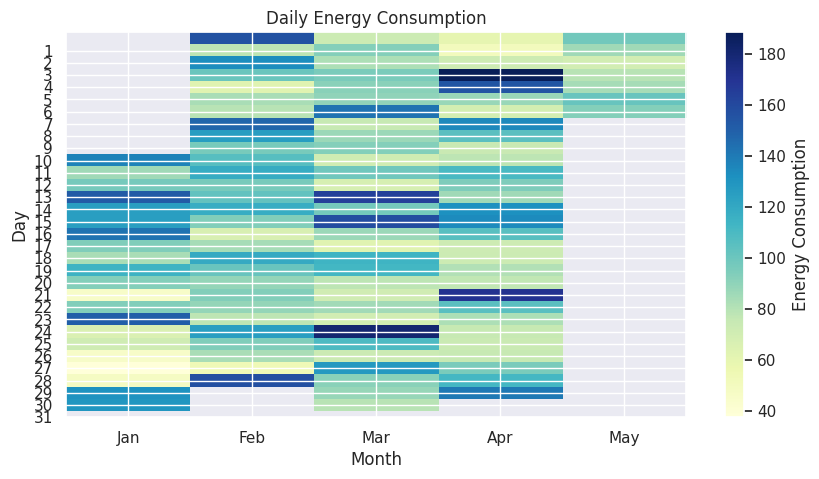

In [31]:
# Create a pivot table to aggregate the daily energy consumption
daily_energy = data.pivot_table(values='equipment_energy_consumption', index='day', columns='month', aggfunc = 'mean')

# Create a heatmap using the pivot table
plt.figure(figsize=(10, 5))
plt.title('Daily Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Day')
plt.imshow(daily_energy, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Energy Consumption')
plt.xticks(range(0,5), ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.yticks(range(1, 32))
plt.show()

## Chart - 2

Text(0, 0.5, 'Energy Consumption')

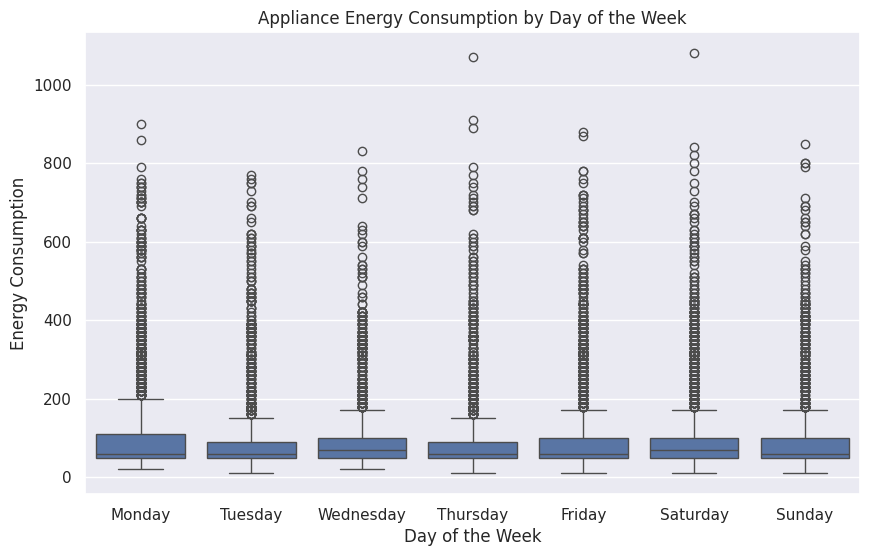

In [32]:
# Map the day of the week values to their respective names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['day_of_week'] = data['day_of_week'].map(lambda x: day_names[x])

# Create a box plot or violin plot to compare energy consumption across different days of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='equipment_energy_consumption', data=data, order=day_names)  # or sns.violinplot()
plt.title('Appliance Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumption')

## Chart 3

In [33]:
# Create a line plot to show the trend of energy consumption over time
import plotly.express as px

# Assuming you have a DataFrame 'data' with a datetime index
fig = px.line(data, x=data.index, y='equipment_energy_consumption', title='Energy Consumption of Appliances Over Time')
fig.update_xaxes(title_text='Date', tickangle=-45)
fig.update_yaxes(title_text='Energy Consumption')

# Show the Plotly figure
fig.show()

## Chart - 4

In [34]:
# Dropping the lights column:
data.drop(columns='day_of_week', inplace=True)

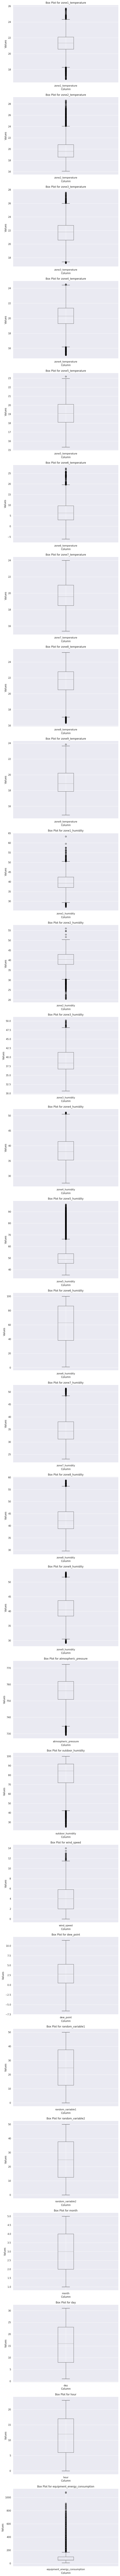

In [35]:
# Chart - 4 visualization code
# Examining the outlier in the dataset
# Assuming 'data' is your DataFrame
num_columns = len(data.columns)
fig, axes = plt.subplots(nrows=num_columns, figsize=(8, num_columns*6))

for i, column in enumerate(data.columns):
    # Exclude 'day_of_week' from the visualization
    if column != 'day_of_week':
        data.boxplot(column=column, ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')
        axes[i].set_xlabel('Column')
        axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

## Chart 5

In [36]:
# Chart - 5 visualization code
#close look on four columns
fig_sub = make_subplots(rows=1, cols=4, shared_yaxes=False)

fig_sub.add_trace(go.Box(y=data['equipment_energy_consumption'].values,name='equipment_energy_consumption'),row=1, col=1)
fig_sub.add_trace(go.Box(y=data['wind_speed'].values,name='wind_speed'),row=1, col=2)
# Replace 'visibility_index' with an existing column name from your DataFrame
# For example, if you have a column named 'outdoor_humidity', you can use it instead:
fig_sub.add_trace(go.Box(y=data['outdoor_humidity'].values,name='outdoor_humidity'),row=1, col=3)
fig_sub.add_trace(go.Box(y=data['atmospheric_pressure'].values,name='atmospheric_pressure'),row=1, col=4)

fig_sub.show()

## Chart - 6

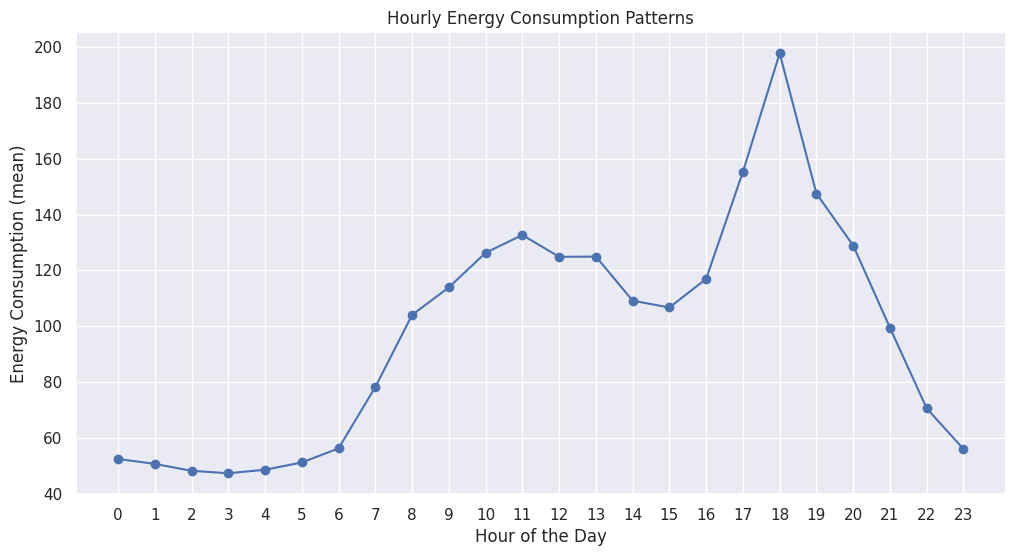

In [37]:
# Chart - 6 visualization code
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the energy consumption data
# You can group the data by hour and calculate the mean energy consumption for each hour
hourly_energy = data.groupby('hour')['equipment_energy_consumption'].mean()

# Create a line chart to visualize the hourly energy consumption patterns
plt.figure(figsize=(12, 6))
plt.plot(hourly_energy.index, hourly_energy.values, marker='o', linestyle='-')
plt.title('Hourly Energy Consumption Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (mean)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

## Chart 7

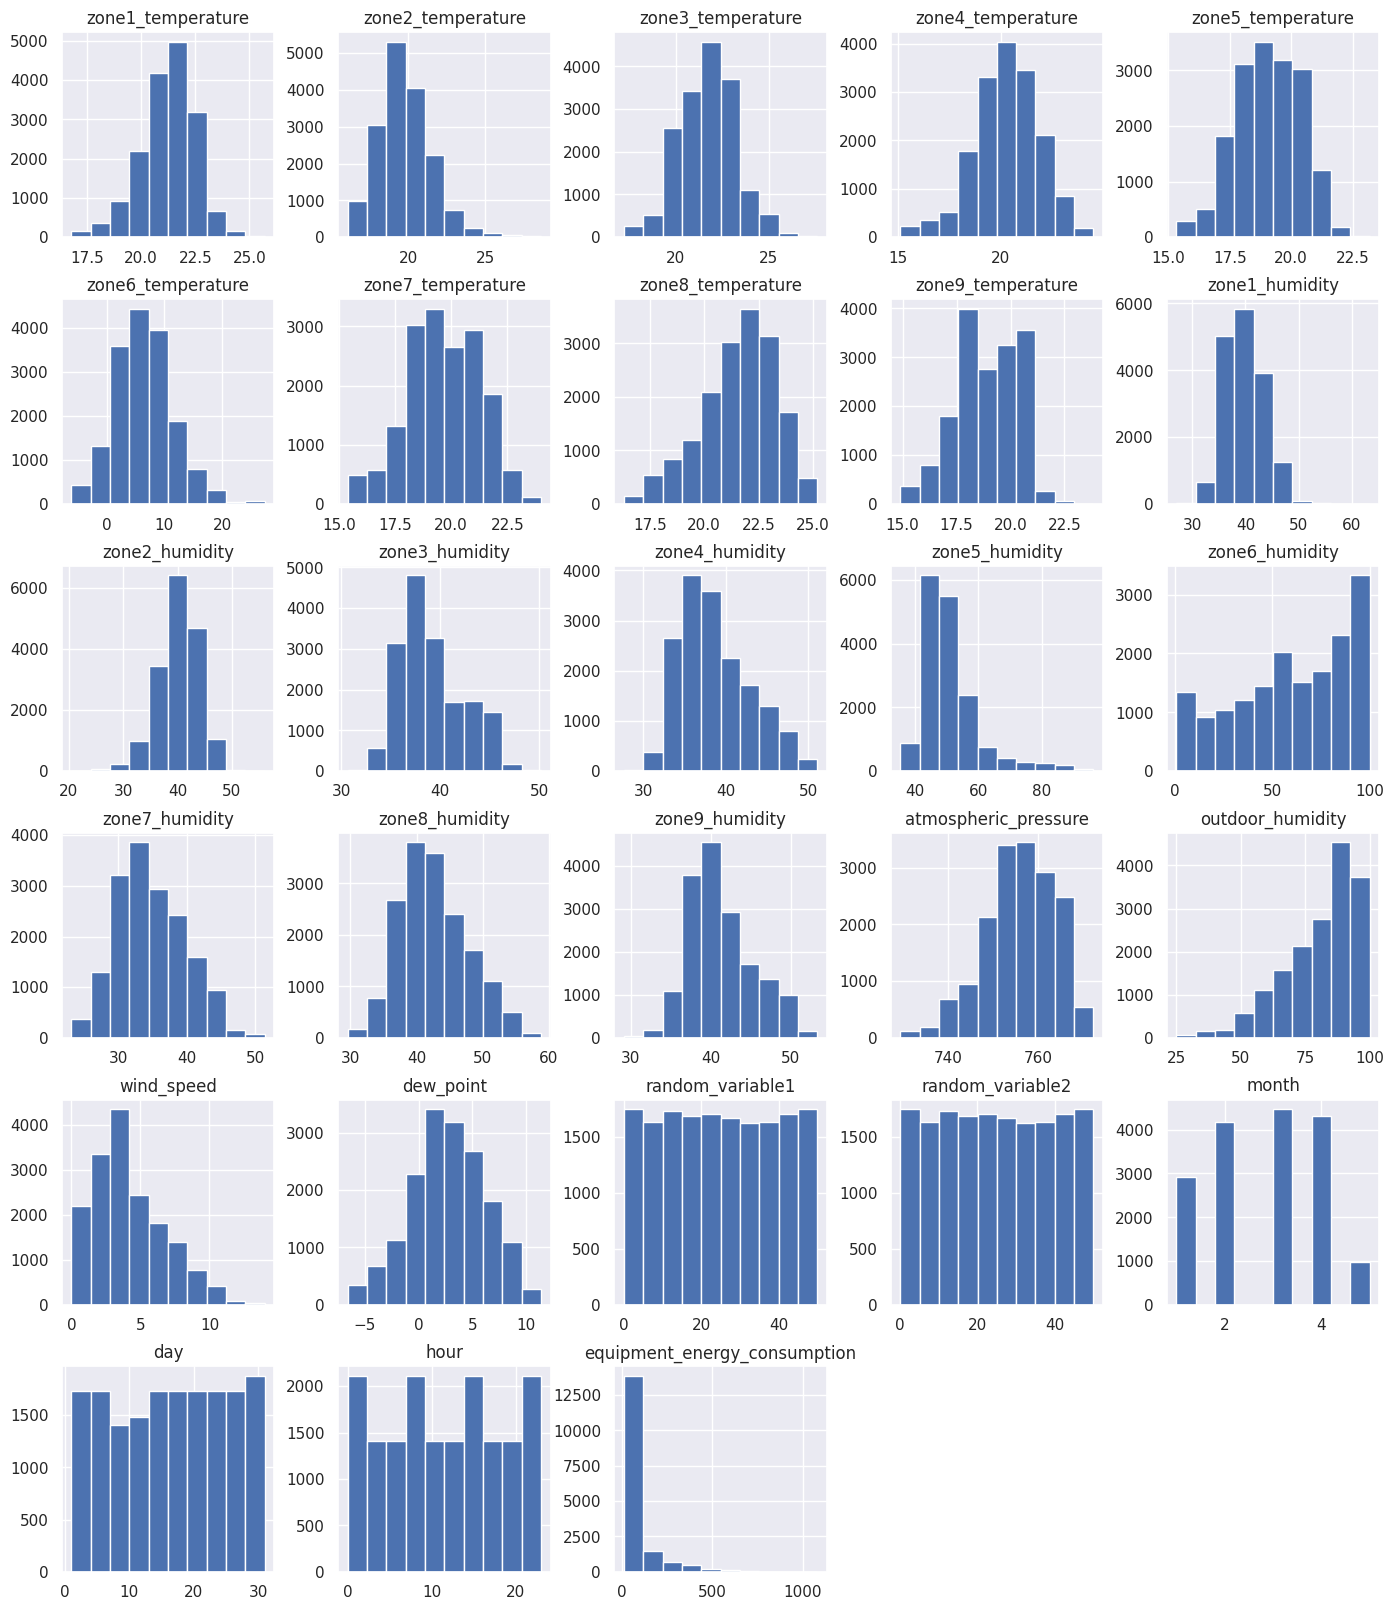

In [39]:
# Visualizing distributions using Histograms:
data.hist(figsize=(17, 20), grid=True);

## Chart 8

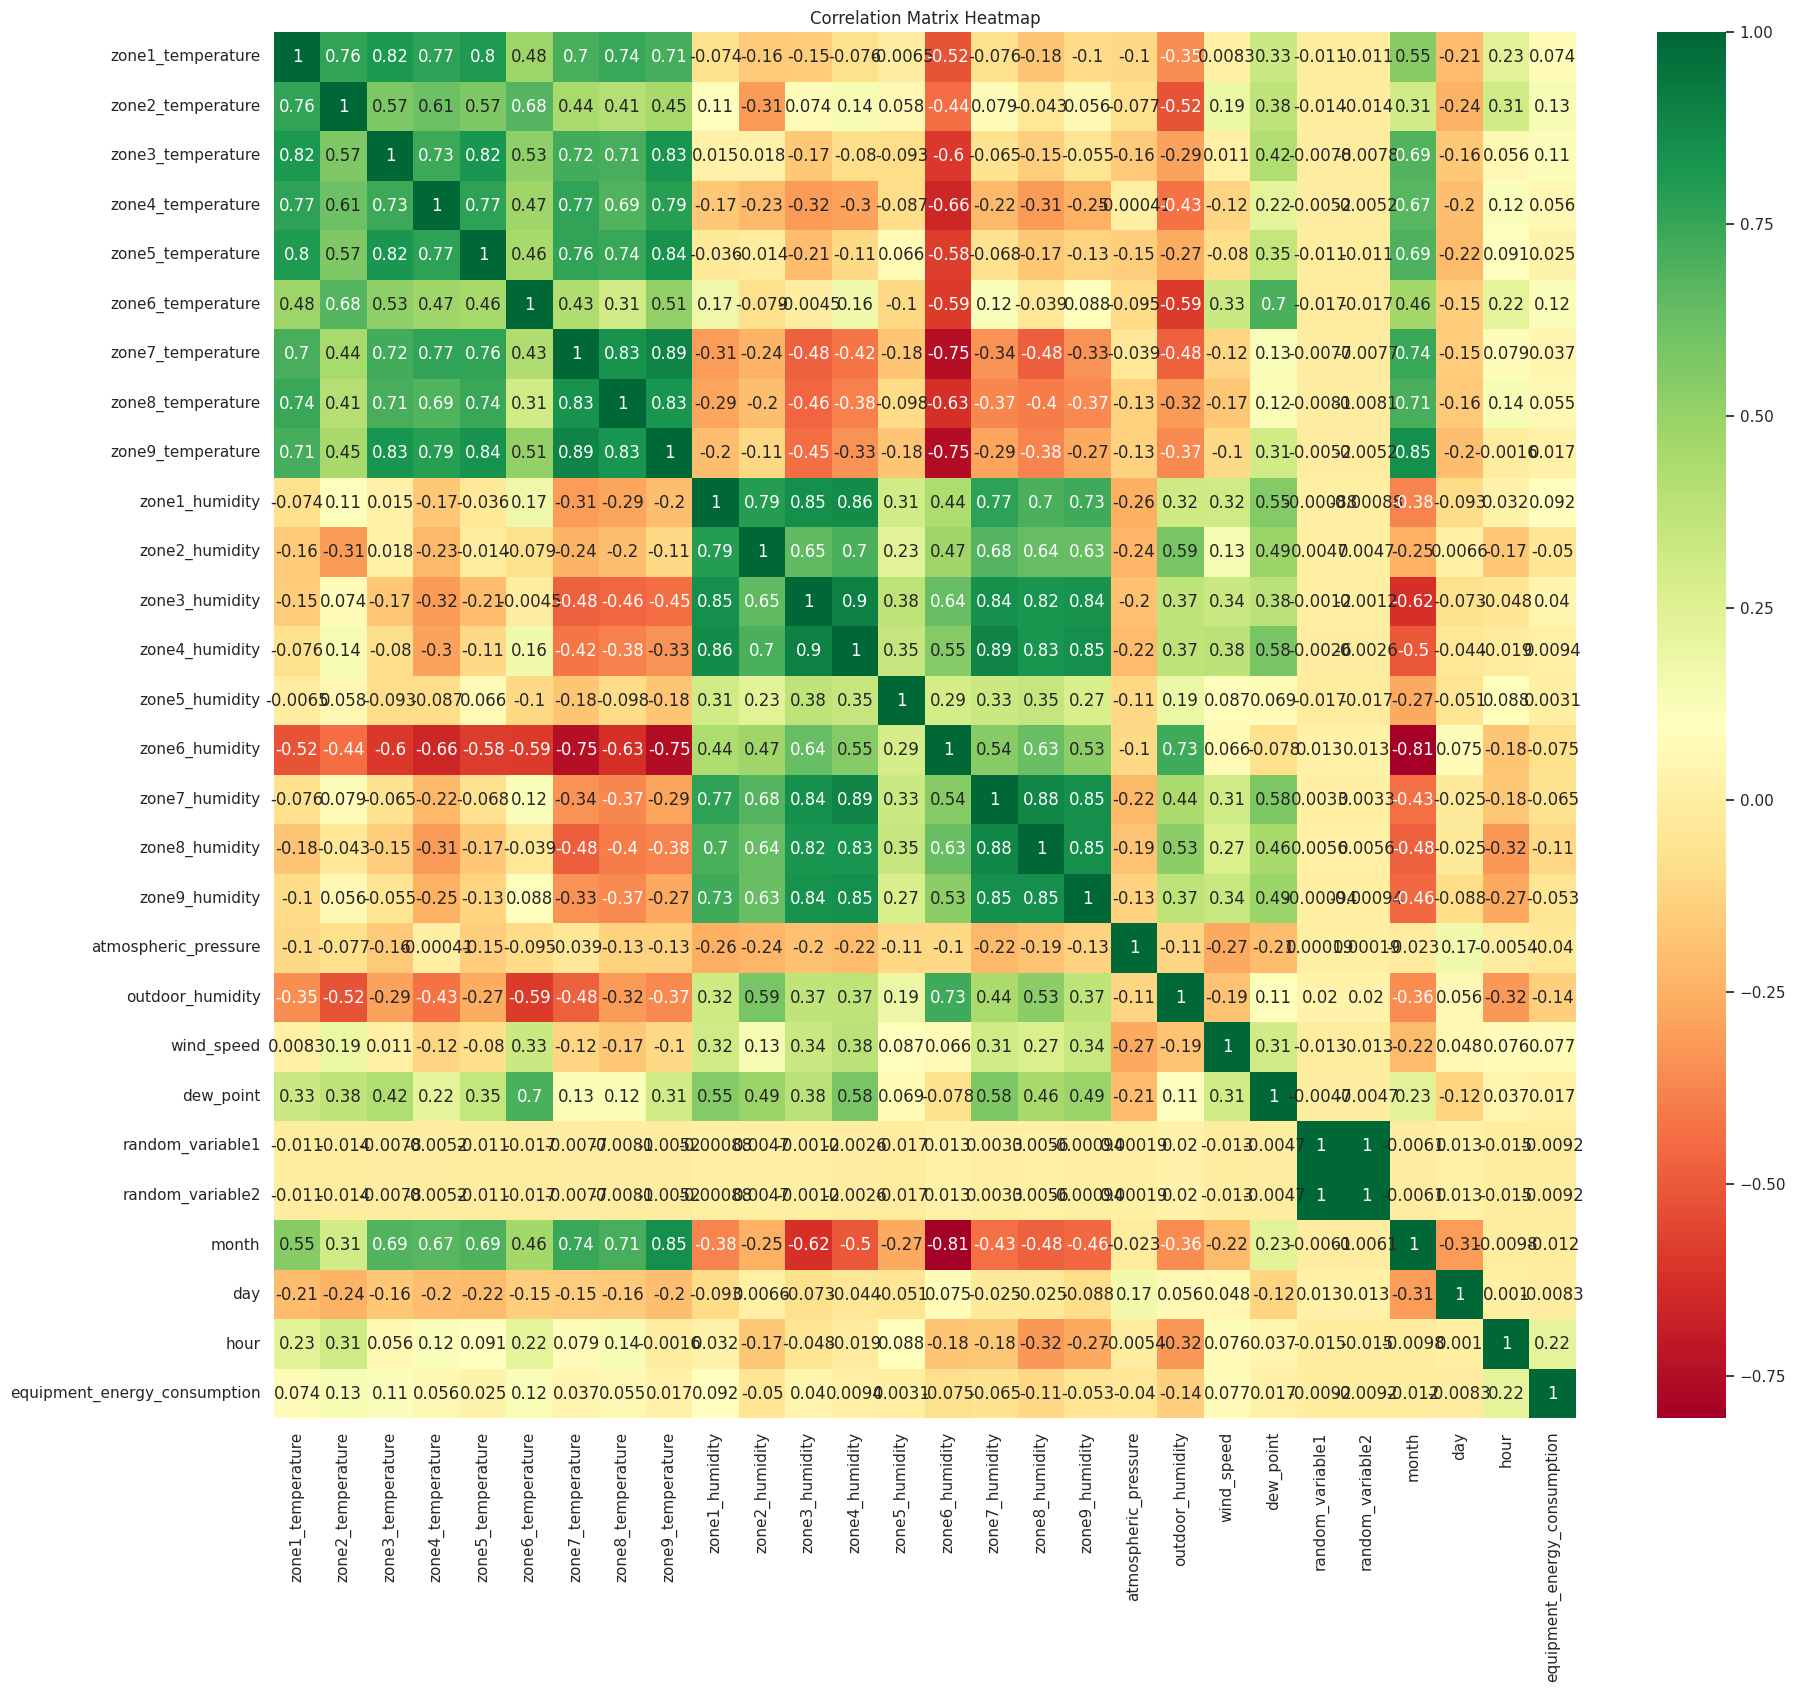

In [40]:
# Correlation Heatmap visualization code
correlation_matrix = data.corr()
plt.figure(figsize=(21, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Chart 9

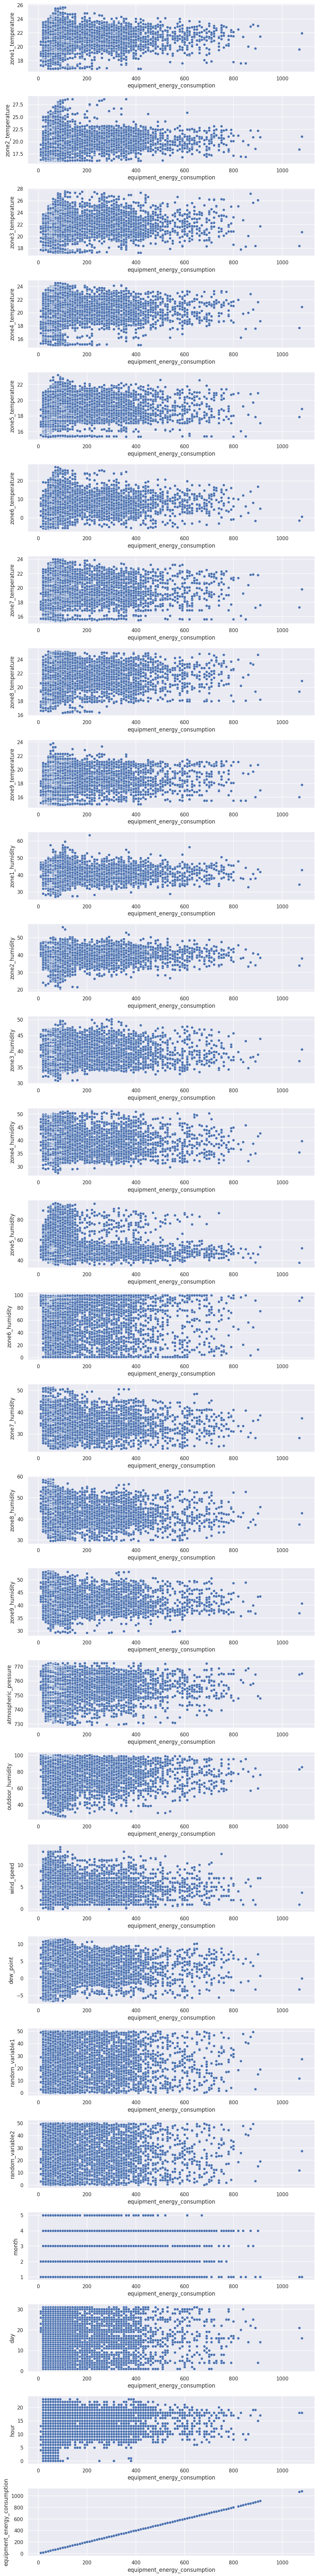

In [41]:
# Get the list of column names in your dataset
columns = data.columns

# Determine the number of rows and columns for subplots
num_rows = len(columns)
num_cols = 1

# Create subplots with specified number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 80))

# Iterate over each column (excluding "equipment_energy_consumption") and create pair plot
for i, column in enumerate(columns):
    #if column != "equipment_energy_consumption":
        sns.scatterplot(data=data, x="equipment_energy_consumption", y=column, ax=axes[i])
        axes[i].set_xlabel("equipment_energy_consumption")
        axes[i].set_ylabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## 5. Feature Engineering & Data Pre-processing

### **5.1. Handling Missing Values**

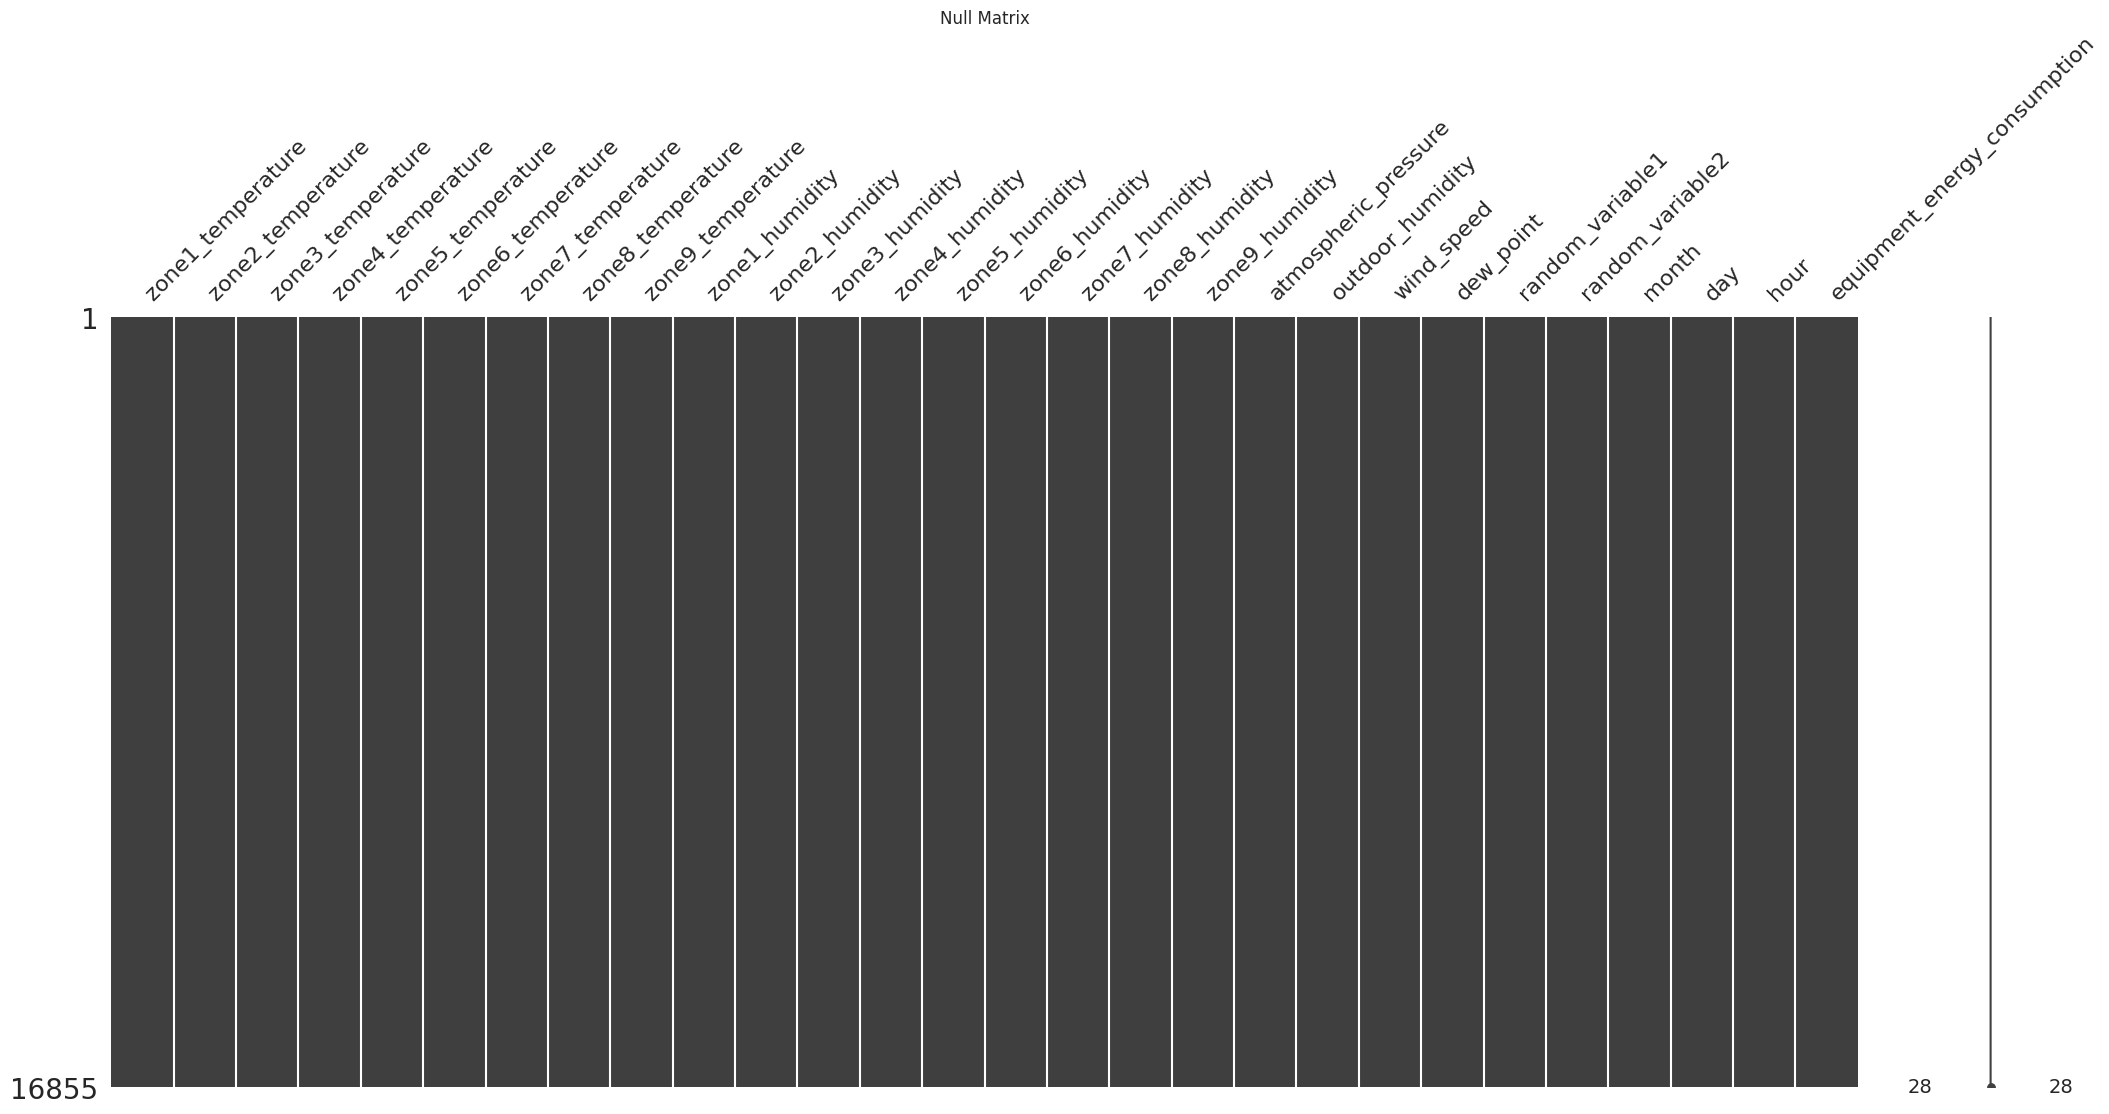

In [45]:
# Visualizing the missing values
import missingno as msno
import matplotlib.pyplot as plt

# Plotting the null matrix
msno.matrix(data)

# Customizing the plot
plt.title('Null Matrix')
plt.show()

### **5.2 2. Handling Outliers**

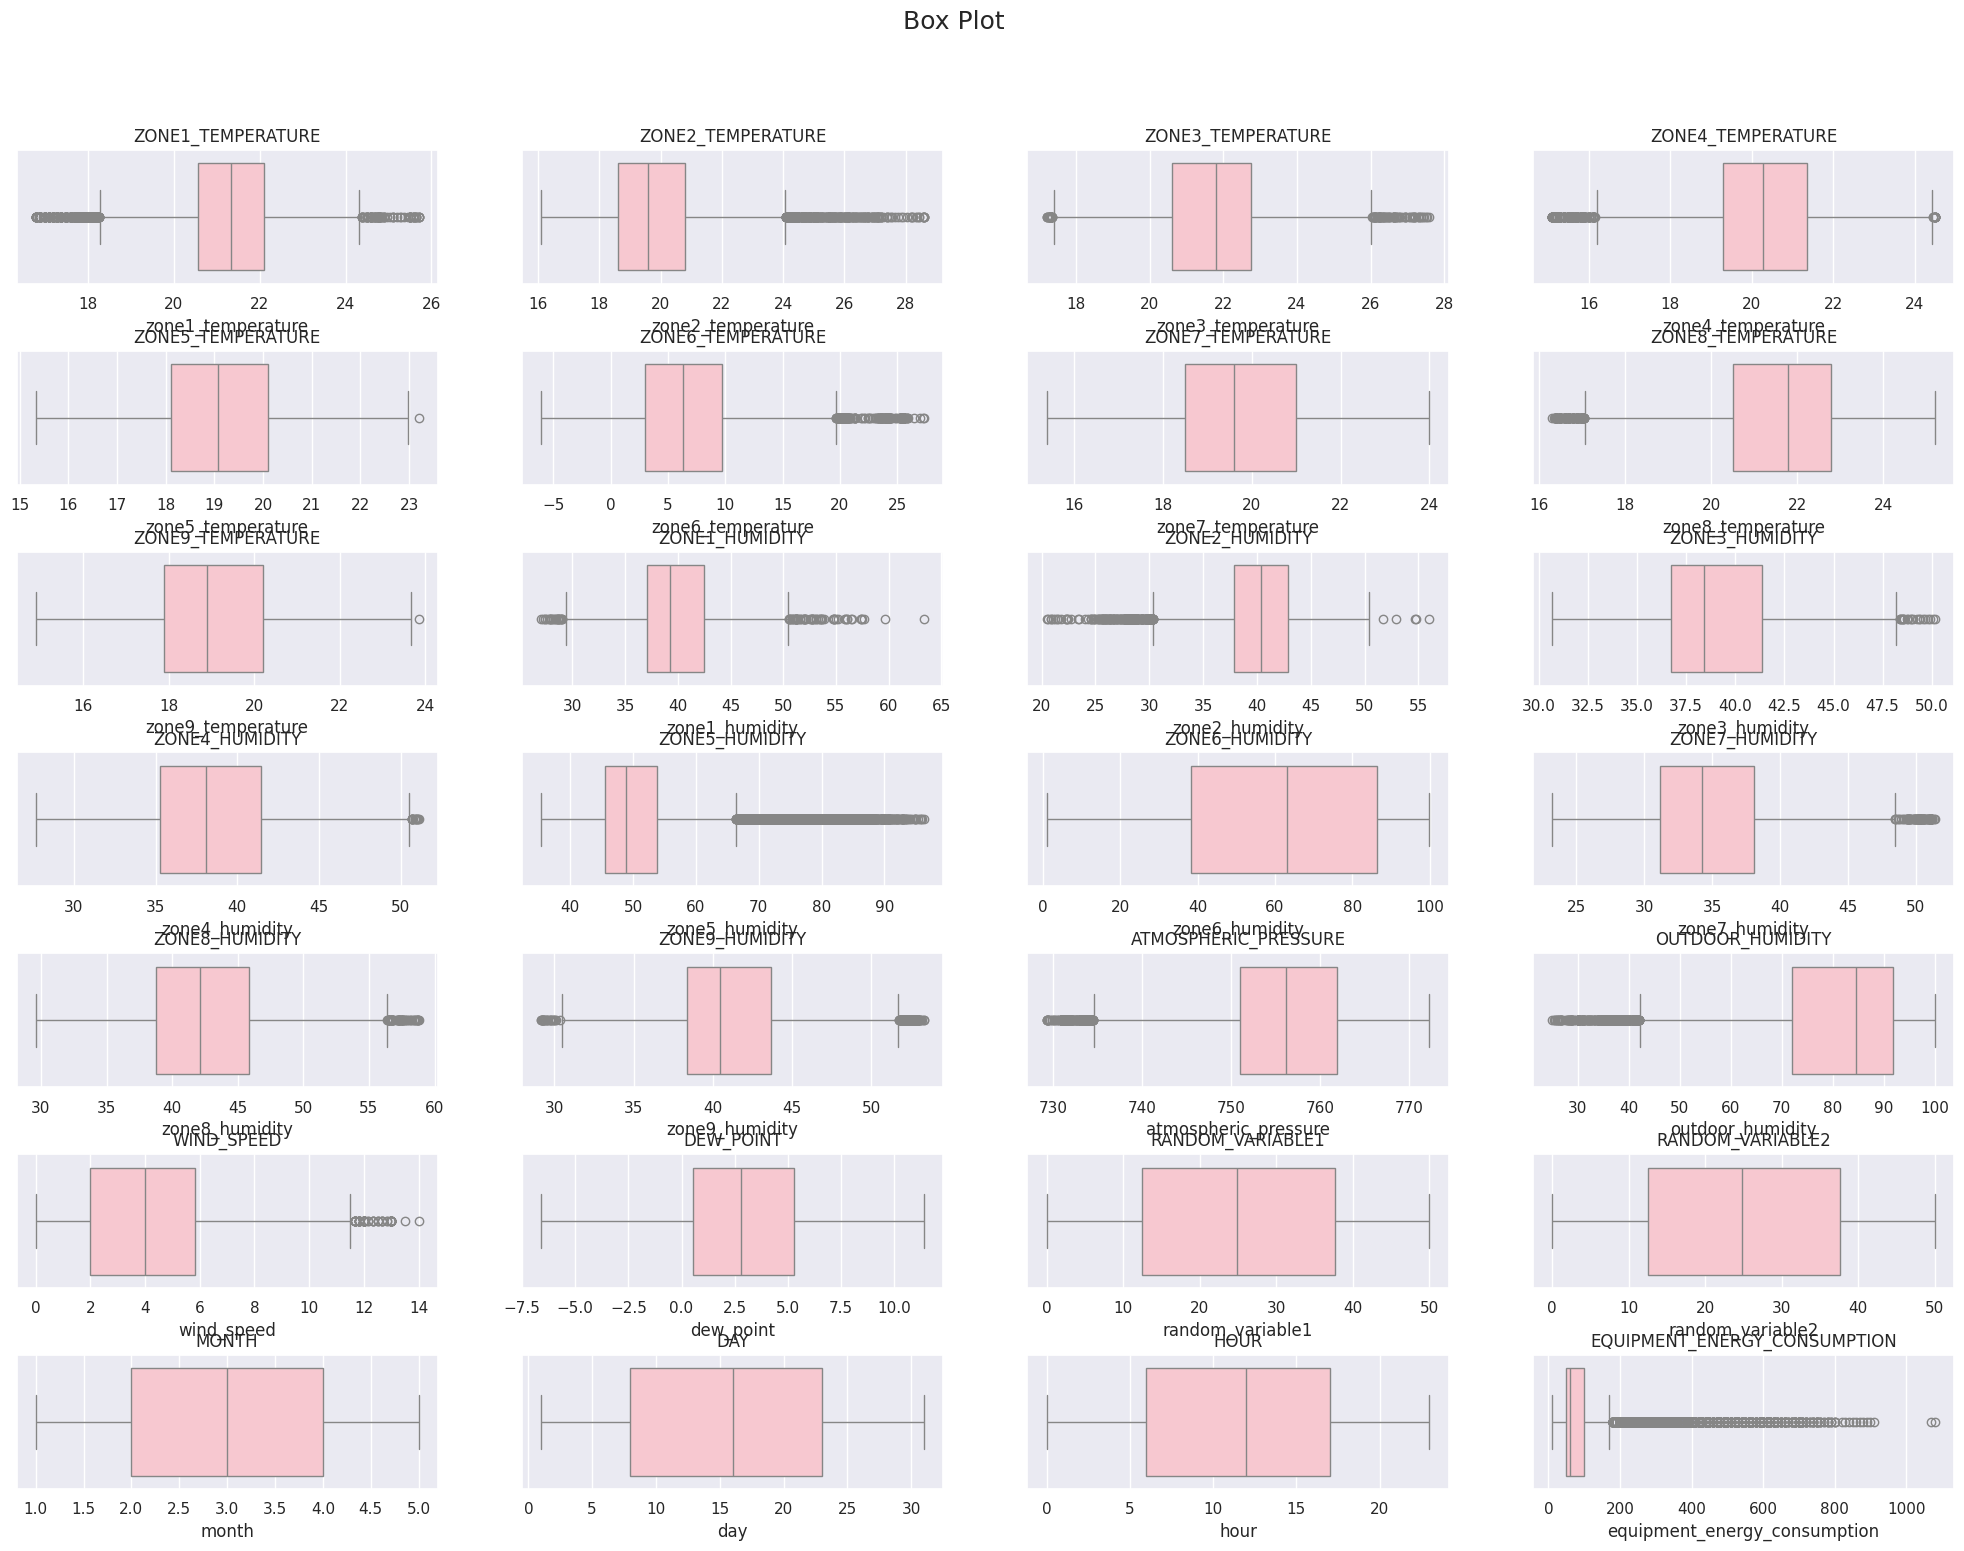

In [46]:
# Handling Outliers & Outlier treatments
df= data.copy()
col_list = list(df.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [47]:
# Handling Outliers & Outlier treatments
import pandas as pd
import numpy as np

def find_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (data < lower_bound) | (data > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers


outliers_per_column = find_outliers_iqr(data)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))

Number of outliers per column:
equipment_energy_consumption    1870
zone5_humidity                  1138
zone1_temperature                474
zone2_temperature                309
outdoor_humidity                 303
zone4_temperature                261
zone6_temperature                212
zone2_humidity                   211
atmospheric_pressure             158
zone9_humidity                   126
zone8_temperature                110
zone3_temperature                106
wind_speed                        93
zone1_humidity                    85
zone7_humidity                    85
zone8_humidity                    57
zone3_humidity                    21
zone4_humidity                    13
zone5_temperature                  1
zone9_temperature                  1
zone7_temperature                  0
zone6_humidity                     0
random_variable1                   0
dew_point                          0
random_variable2                   0
month                              0
day    

In [48]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df[ftr], 25)
  q_75 = np.percentile(df[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    data[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

zone1_temperature 

Percentiles: 25th=20.575, 75th=22.100, IQR=1.525

lower = 18.287499999999994 and upper = 24.387500000000003 
 
Identified outliers: 474
zone1_temperature Outliers Removed

-------

zone2_temperature 

Percentiles: 25th=18.600, 75th=20.790, IQR=2.190

lower = 15.315000000000005 and upper = 24.074999999999996 
 
Identified outliers: 309
zone2_temperature Outliers Removed

-------

zone3_temperature 

Percentiles: 25th=20.600, 75th=22.760, IQR=2.160

lower = 17.36 and upper = 26.0 
 
Identified outliers: 106
zone3_temperature Outliers Removed

-------

zone4_temperature 

Percentiles: 25th=19.290, 75th=21.357, IQR=2.067

lower = 16.189999999999948 and upper = 24.456666666666756 
 
Identified outliers: 261
zone4_temperature Outliers Removed

-------

zone5_temperature 

Percentiles: 25th=18.100, 75th=20.100, IQR=2.000

lower = 15.100000000000001 and upper = 23.1 
 
Identified outliers: 1
zone5_temperature Outliers Removed

-------

zone6_temperature 

Percentiles: 25th=

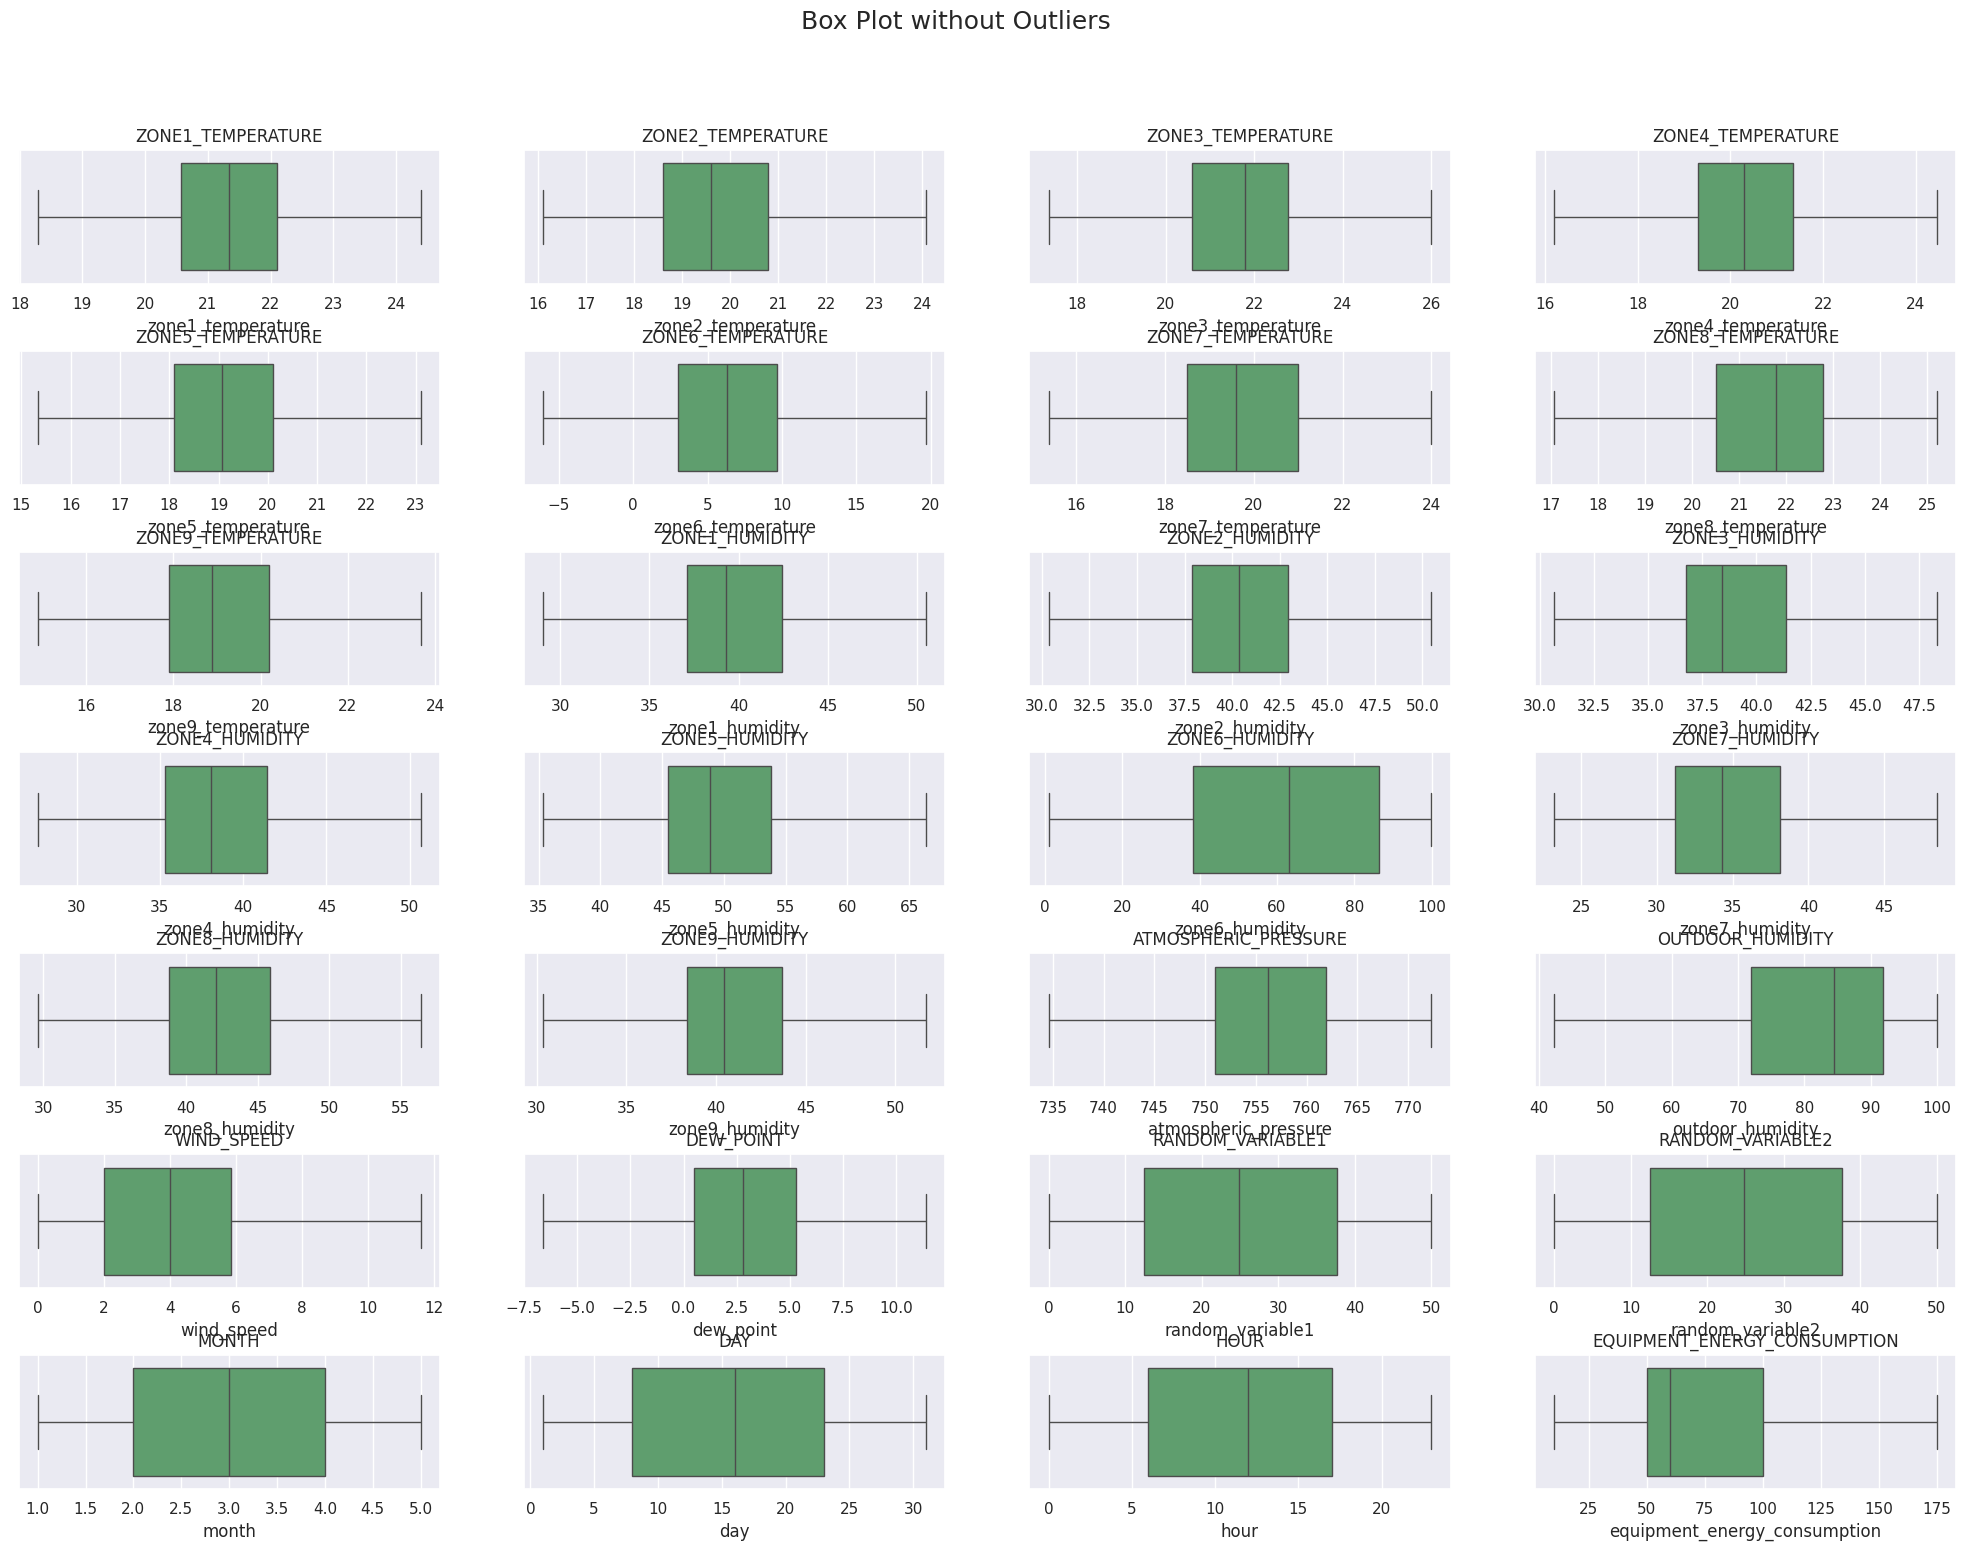

In [49]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=data[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [50]:
#examining the shape after
data.shape

(16855, 28)

### **5.3 Feature Manipulation & Selection**

In [52]:
# Manipulate Features to minimize feature correlation and create new features
# create new features
# create a column average building temperature based on all temperature
data['Average_building_Temperature']=data[['zone1_temperature','zone2_temperature','zone3_temperature','zone4_temperature','zone5_temperature','zone6_temperature','zone7_temperature','zone8_temperature','zone9_temperature']].mean(axis=1)
#create a column of difference between outside and inside temperature
data['Temperature_difference']=abs(data['Average_building_Temperature']-data['zone6_temperature'])

#create a column average building humidity
data['Average_building_humidity']=data[['zone1_humidity','zone2_humidity','zone3_humidity', 'zone4_humidity','zone5_humidity','zone6_humidity','zone7_humidity','zone8_humidity','zone9_humidity']].mean(axis=1)
#create a column of difference between outside and inside building humidity
data['Humidity_difference']=abs(data['zone6_humidity']-data['Average_building_humidity'])

In [53]:
# drop random variables as it does not look like that much important while predicting the output
columns_to_drop = ['random_variable1','random_variable2']
data.drop(columns_to_drop, axis=1, inplace=True)

In [54]:
data.shape

(16855, 30)

### **5.4 Finding the skewed and symmetrical data**

In [55]:
#examining the skewness in the dataset to check the distribution
skewness = data.skew()

#ginding the absolute value
abs(skewness)

# setting up the threshold
skewness_threshold = 0.5

# Separate features into symmetrical and skewed based on skewness threshold
symmetrical_features = skewness[abs(skewness) < skewness_threshold].index
skewed_features = skewness[abs(skewness) >= skewness_threshold].index

# Create new DataFrames for symmetrical and skewed features
print('FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :')
symmetrical_data = data[symmetrical_features]
print(symmetrical_features)

print('FEATURES FOLLOWED SKEWED DISTRIBUTION :')
skewed_data = data[skewed_features]
print(skewed_features)

FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :
Index(['zone1_temperature', 'zone2_temperature', 'zone3_temperature',
       'zone4_temperature', 'zone5_temperature', 'zone6_temperature',
       'zone7_temperature', 'zone9_temperature', 'zone1_humidity',
       'zone2_humidity', 'zone6_humidity', 'zone7_humidity', 'zone8_humidity',
       'atmospheric_pressure', 'dew_point', 'month', 'day', 'hour',
       'Average_building_Temperature', 'Temperature_difference',
       'Average_building_humidity', 'Humidity_difference'],
      dtype='object')
FEATURES FOLLOWED SKEWED DISTRIBUTION :
Index(['zone8_temperature', 'zone3_humidity', 'zone4_humidity',
       'zone5_humidity', 'zone9_humidity', 'outdoor_humidity', 'wind_speed',
       'equipment_energy_consumption'],
      dtype='object')


### **5.5 Data Transformation**

In [56]:
#examining the skewed data
skewed_data

zone8_temperature  zone3_humidity  zone4_humidity  \
timestamp                                                                
2016-01-11 17:00:00              18.20       44.730000       45.566667   
2016-01-11 17:10:00              18.20       44.790000       45.992500   
2016-01-11 17:20:00              18.20       44.933333       45.890000   
2016-01-11 17:30:00              18.10       45.000000       45.723333   
2016-01-11 17:40:00              18.10       45.000000       45.530000   
...                                ...             ...             ...   
2016-05-07 17:20:00              24.79       35.966667       35.245000   
2016-05-07 17:30:00              24.79       35.966667       35.290000   
2016-05-07 17:40:00              24.79       35.826667       35.290000   
2016-05-07 17:50:00              24.79       35.700000       35.290000   
2016-05-07 18:00:00              24.79       35.700000       35.200000   

                     zone5_humidity  zone9_humidity  outdoor_humidity  \
timestamp                                                               
2016-01-11 17:00:00       55.200000          45.530             92.00   
2016-01-11 17:10:00       55.200000          45.560             92.00   
2016-01-11 17:20:00       55.090000          45.500             92.00   
2016-01-11 17:30:00       55.090000          45.400             92.00   
2016-01-11 17:40:00       55.090000          45.400             92.00   
...                             ...             ...               ...   
2016-05-07 17:20:00       44.400000          38.200             42.25   
2016-05-07 17:30:00       44.433333          38.200             42.25   
2016-05-07 17:40:00       44.500000          38.200             42.25   
2016-05-07 17:50:00       44.500000          38.200             42.25   
2016-05-07 18:00:00       44.433333          38.178             42.25   

                     wind_speed  equipment_energy_consumption  
timestamp                                                      
2016-01-11 17:00:00    7.000000                          60.0  
2016-01-11 17:10:00    6.666667                          60.0  
2016-01-11 17:20:00    6.333333                          50.0  
2016-01-11 17:30:00    6.000000                          50.0  
2016-01-11 17:40:00    5.666667                          60.0  
...                         ...                           ...  
2016-05-07 17:20:00    3.666667                          90.0  
2016-05-07 17:30:00    3.500000                          90.0  
2016-05-07 17:40:00    3.333333                          80.0  
2016-05-07 17:50:00    3.166667                          70.0  
2016-05-07 18:00:00    3.000000                          80.0  

[16855 rows x 8 columns]

In [57]:
#import the liabrary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
power_transformer = PowerTransformer()

# Fit and transform the data using the PowerTransformer
power_transformed = pd.DataFrame(power_transformer.fit_transform(skewed_data))
power_transformed.columns = skewed_data.columns

In [58]:
#examining the power transformed data
power_transformed

zone8_temperature  zone3_humidity  zone4_humidity  zone5_humidity  \
0              -1.777846        1.565640        1.482259        0.843752   
1              -1.777846        1.577609        1.548411        0.843752   
2              -1.777846        1.605973        1.532633        0.830601   
3              -1.817087        1.619058        1.506783        0.830601   
4              -1.817087        1.619058        1.476488        0.830601   
...                  ...             ...             ...             ...   
16850           2.239133       -1.034890       -0.792015       -0.909487   
16851           2.239133       -1.034890       -0.778269       -0.902194   
16852           2.239133       -1.095629       -0.778269       -0.887654   
16853           2.239133       -1.151306       -0.778269       -0.887654   
16854           2.239133       -1.151306       -0.805806       -0.902194   

       zone9_humidity  outdoor_humidity  wind_speed  \
0            1.085644          0.851783    1.122416   
1            1.091752          0.851783    1.031011   
2            1.079528          0.851783    0.935981   
3            1.059074          0.851783    0.837006   
4            1.059074          0.851783    0.733723   
...               ...               ...         ...   
16850       -0.736559         -1.987537   -0.005332   
16851       -0.736559         -1.987537   -0.079133   
16852       -0.736559         -1.987537   -0.155420   
16853       -0.736559         -1.987537   -0.234378   
16854       -0.743226         -1.987537   -0.316211   

       equipment_energy_consumption  
0                         -0.212879  
1                         -0.212879  
2                         -0.582035  
3                         -0.582035  
4                         -0.212879  
...                             ...  
16850                      0.567225  
16851                      0.567225  
16852                      0.346353  
16853                      0.090290  
16854                      0.346353  

[16855 rows x 8 columns]

In [59]:
# Reset the index to the default integer index
symmetrical_data.reset_index(drop=True, inplace=True)

In [60]:
#examining the symmetrical data
symmetrical_data

zone1_temperature  zone2_temperature  zone3_temperature  \
0                19.8900             19.200          19.790000   
1                19.8900             19.200          19.790000   
2                19.8900             19.200          19.790000   
3                19.8900             19.200          19.790000   
4                19.8900             19.200          19.790000   
...                  ...                ...                ...   
16850            24.3875             24.075          25.290000   
16851            24.3875             24.075          25.290000   
16852            24.3875             24.075          25.290000   
16853            24.3875             24.075          25.390000   
16854            24.3875             24.075          25.323333   

       zone4_temperature  zone5_temperature  zone6_temperature  \
0              19.000000          17.166667           7.026667   
1              19.000000          17.166667           6.833333   
2              18.926667          17.166667           6.560000   
3              18.890000          17.166667           6.433333   
4              18.890000          17.200000           6.366667   
...                  ...                ...                ...   
16850          24.456667          22.000000          19.680000   
16851          24.456667          22.033333          19.680000   
16852          24.456667          22.166667          19.680000   
16853          24.456667          22.290000          19.680000   
16854          24.456667          22.290000          19.680000   

       zone7_temperature  zone9_temperature  zone1_humidity  zone2_humidity  \
0              17.200000          17.033333       47.596667       44.790000   
1              17.200000          17.066667       46.693333       44.722500   
2              17.200000          17.000000       46.300000       44.626667   
3              17.133333          17.000000       46.066667       44.590000   
4              17.200000          17.000000       46.333333       44.530000   
...                  ...                ...             ...             ...   
16850          23.456000          22.290000       33.133333       30.356667   
16851          23.528571          22.290000       33.433333       30.633333   
16852          23.600000          22.290000       33.375000       30.700000   
16853          23.600000          22.290000       33.000000       30.666667   
16854          23.660000          22.290000       32.860000       30.600000   

       zone6_humidity  zone7_humidity  zone8_humidity  atmospheric_pressure  \
0           84.256667       41.626667       48.900000            734.566667   
1           84.063333       41.560000       48.863333            734.566667   
2           83.156667       41.433333       48.730000            734.566667   
3           83.423333       41.290000       48.590000            734.566667   
4           84.893333       41.230000       48.590000            734.566667   
...               ...             ...             ...                   ...   
16850        1.000000       32.196000       36.264286            751.266667   
16851        1.000000       32.497143       36.400000            751.250000   
16852        1.000000       32.790000       36.324286            751.233333   
16853        1.000000       32.941429       36.200000            751.216667   
16854        1.000000       33.076000       36.168571            751.200000   

       dew_point  month  day  hour  Average_building_Temperature  \
0       5.300000      1   11    17                     17.167407   
1       5.200000      1   11    17                     17.149630   
2       5.100000      1   11    17                     17.103704   
3       5.000000      1   11    17                     17.067037   
4       4.900000      1   11    17                     17.070741   
...          ...    ...  ...   ...                           ...   
16850   5.766667      5    7    17             

In [61]:
# Concatenate horizontally (along columns)
tranformed_data = pd.concat([symmetrical_data, power_transformed], axis=1)

In [62]:
#examining the transformed data
tranformed_data

zone1_temperature  zone2_temperature  zone3_temperature  \
0                19.8900             19.200          19.790000   
1                19.8900             19.200          19.790000   
2                19.8900             19.200          19.790000   
3                19.8900             19.200          19.790000   
4                19.8900             19.200          19.790000   
...                  ...                ...                ...   
16850            24.3875             24.075          25.290000   
16851            24.3875             24.075          25.290000   
16852            24.3875             24.075          25.290000   
16853            24.3875             24.075          25.390000   
16854            24.3875             24.075          25.323333   

       zone4_temperature  zone5_temperature  zone6_temperature  \
0              19.000000          17.166667           7.026667   
1              19.000000          17.166667           6.833333   
2              18.926667          17.166667           6.560000   
3              18.890000          17.166667           6.433333   
4              18.890000          17.200000           6.366667   
...                  ...                ...                ...   
16850          24.456667          22.000000          19.680000   
16851          24.456667          22.033333          19.680000   
16852          24.456667          22.166667          19.680000   
16853          24.456667          22.290000          19.680000   
16854          24.456667          22.290000          19.680000   

       zone7_temperature  zone9_temperature  zone1_humidity  zone2_humidity  \
0              17.200000          17.033333       47.596667       44.790000   
1              17.200000          17.066667       46.693333       44.722500   
2              17.200000          17.000000       46.300000       44.626667   
3              17.133333          17.000000       46.066667       44.590000   
4              17.200000          17.000000       46.333333       44.530000   
...                  ...                ...             ...             ...   
16850          23.456000          22.290000       33.133333       30.356667   
16851          23.528571          22.290000       33.433333       30.633333   
16852          23.600000          22.290000       33.375000       30.700000   
16853          23.600000          22.290000       33.000000       30.666667   
16854          23.660000          22.290000       32.860000       30.600000   

       zone6_humidity  zone7_humidity  zone8_humidity  atmospheric_pressure  \
0           84.256667       41.626667       48.900000            734.566667   
1           84.063333       41.560000       48.863333            734.566667   
2           83.156667       41.433333       48.730000            734.566667   
3           83.423333       41.290000       48.590000            734.566667   
4           84.893333       41.230000       48.590000            734.566667   
...               ...             ...             ...                   ...   
16850        1.000000       32.196000       36.264286            751.266667   
16851        1.000000       32.497143       36.400000            751.250000   
16852        1.000000       32.790000       36.324286            751.233333   
16853        1.000000       32.941429       36.200000            751.216667   
16854        1.000000       33.076000       36.168571            751.200000   

       dew_point  month  day  hour  Average_building_Temperature  \
0       5.300000      1   11    17                     17.167407   
1       5.200000      1   11    17                     17.149630   
2       5.100000      1   11    17                     17.103704   
3       5.000000      1   11    17                     17.067037   
4       4.900000      1   11    17                     17.070741   
...          ...    ...  ...   ...                           ...   
16850   5.766667      5    7    17             

### **5.6 Scaling the DATA set**

In [63]:
#importing the desired liabrary
from sklearn.preprocessing import StandardScaler

# StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(tranformed_data))
scaled_data.columns = tranformed_data.columns
scaled_data

zone1_temperature  zone2_temperature  zone3_temperature  \
0              -1.122416          -0.346946          -1.258157   
1              -1.122416          -0.346946          -1.258157   
2              -1.122416          -0.346946          -1.258157   
3              -1.122416          -0.346946          -1.258157   
4              -1.122416          -0.346946          -1.258157   
...                  ...                ...                ...   
16850           2.555362           2.622555           2.361398   
16851           2.555362           2.622555           2.361398   
16852           2.555362           2.622555           2.361398   
16853           2.555362           2.622555           2.427209   
16854           2.555362           2.622555           2.383335   

       zone4_temperature  zone5_temperature  zone6_temperature  \
0              -0.829653          -1.429348           0.103417   
1              -0.829653          -1.429348           0.064349   
2              -0.876798          -1.429348           0.009116   
3              -0.900371          -1.429348          -0.016480   
4              -0.900371          -1.404091          -0.029952   
...                  ...                ...                ...   
16850           2.678411           2.232887           2.660315   
16851           2.678411           2.258144           2.660315   
16852           2.678411           2.359171           2.660315   
16853           2.678411           2.452621           2.660315   
16854           2.678411           2.452621           2.660315   

       zone7_temperature  zone9_temperature  zone1_humidity  zone2_humidity  \
0              -1.517673          -1.266189        2.160626        1.252958   
1              -1.517673          -1.243238        1.910732        1.234415   
2              -1.517673          -1.289141        1.801921        1.208088   
3              -1.558736          -1.289141        1.737373        1.198015   
4              -1.517673          -1.289141        1.811143        1.181532   
...                  ...                ...             ...             ...   
16850           2.335639           2.353235       -1.840450       -2.712073   
16851           2.380338           2.353235       -1.757460       -2.636069   
16852           2.424334           2.353235       -1.773597       -2.617755   
16853           2.424334           2.353235       -1.877335       -2.626912   
16854           2.461290           2.353235       -1.916064       -2.645226   

       zone6_humidity  zone7_humidity  zone8_humidity  atmospheric_pressure  \
0            0.824063        1.366073        1.213752             -2.759411   
1            0.817508        1.352641        1.206643             -2.759411   
2            0.786768        1.327122        1.180794             -2.759411   
3            0.795809        1.298244        1.153653             -2.759411   
4            0.845649        1.286155        1.153653             -2.759411   
...               ...             ...             ...                   ...   
16850       -1.998712       -0.533947       -1.235917             -0.586585   
16851       -1.998712       -0.473275       -1.209606             -0.588754   
16852       -1.998712       -0.414272       -1.224285             -0.590922   
16853       -1.998712       -0.383763       -1.248380             -0.593091   
16854       -1.998712       -0.356651       -1.254473             -0.595259   

       dew_point     month       day      hour  Average_building_Temperature  \
0       0.717951 -1.513569 -0.550783  0.794263                     -1.031592   
1       0.689288 -1.513569 -0.550783  0.794263                     -1.043213   
2       0.660625 -1.513569 -0.550783  0.794263                     -1.073235   
3       0.631962 -1.513569 -0.550783  0.794263                     -1.097204   
4       0.603299 -1.513569 -0.550783  0.794263                     -1.094783   
...          ...       ...       ...       

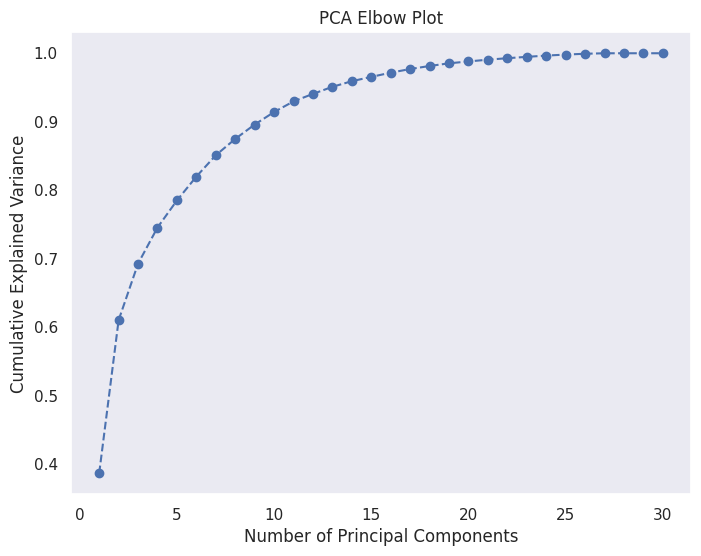

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your standardized data
pca.fit(scaled_data)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create an elbow plot to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Plot')
plt.grid()
plt.show()


# Create a PCA instance and specify the number of components you want to retain
# For example, if you want to retain 10 components, set n_components=10
n_components = 10
pca = PCA(n_components=n_components)

# Fit the PCA model to your standardized data and transform it
transformed_data_pca = pca.fit_transform(scaled_data)

# The variable 'transformed_data_pca' now contains your data in the reduced-dimensional space with 'n_components' principal components.

# You can also access explained variance to see how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_

In [65]:
# the variances of the pca that we extract and there importance in predicting the output
explained_variance

array([0.38630116, 0.22368755, 0.08256067, 0.05278934, 0.03955527,
       0.0349191 , 0.03115185, 0.02387457, 0.02098323, 0.01830717])

In [66]:
#calculating the total of  explained_variance  which needs to be more than 90%
explained_variance.sum()

np.float64(0.9141299066437515)

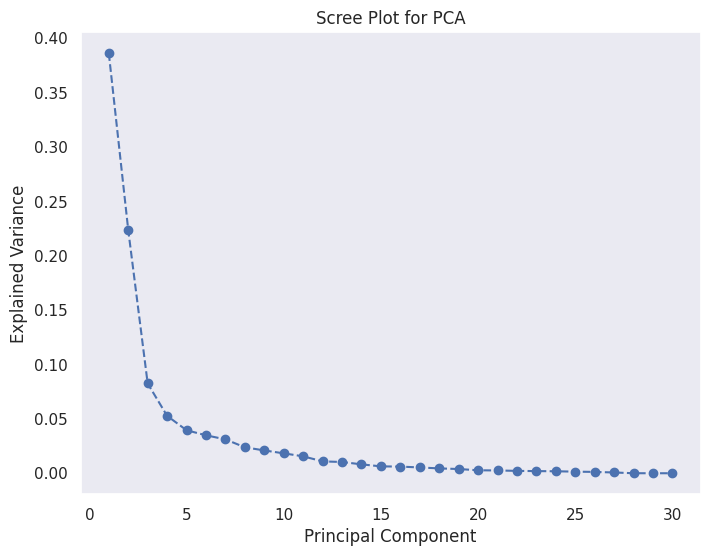

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your standardized data
pca.fit(scaled_data)

# Calculate the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for PCA')
plt.grid()
plt.show()

In [68]:
#examining the shape after pca
transformed_data_pca.shape

(16855, 10)

In [69]:
transformed_data_pca

array([[ 5.44197857,  2.2559614 , -1.36426968, ...,  0.23089749,
        -0.91711275, -0.23712792],
       [ 5.4102304 ,  2.15454125, -1.30213526, ...,  0.20862864,
        -0.94801759, -0.1995412 ],
       [ 5.42157279,  2.01069372, -1.1844819 , ...,  0.32993925,
        -1.17297019, -0.32926498],
       ...,
       [-9.0644163 ,  2.94964958, -1.295149  , ..., -1.03669987,
        -1.16204904,  0.72413633],
       [-9.11781913,  2.99309666, -1.198694  , ..., -0.99710431,
        -1.39987627,  0.70952883],
       [-9.16812436,  3.04733134, -1.27988854, ..., -1.07218806,
        -1.38933821,  0.81474108]])

### **5.7  Data Splitting**

In [71]:
#assinign the independent and dependent feature
x = transformed_data_pca
y = data['equipment_energy_consumption']

In [72]:
#splitting the data into 80/20 ration
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=3)

## **6. ML Model Implementation**

### **ML Model - 1 - Simple Linear Regression Model**

In [138]:
# Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Defining the Linear Regression model
reg = LinearRegression()

# Fitting the model to the training data
reg.fit(x_train, y_train)

# Predicting the values for the training data
y_train_pred = reg.predict(x_train)

# Calculating the training score (R2 score for training data)
train_r2 = reg.score(x_train, y_train)

# Calculating the Mean Squared Error (MSE) for training data
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculating the Root Mean Squared Error (RMSE) for training data
train_rmse = np.sqrt(train_mse)

# Predicting the values for the test data
y_test_pred = reg.predict(x_test)

# Calculating the Mean Squared Error (MSE) for test data
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculating the Root Mean Squared Error (RMSE) for test data
test_rmse = np.sqrt(test_mse)

# Calculating the testing accuracy (R2 score for test data)
test_r2 = r2_score(y_test, y_test_pred)

# Printing all results
print("Train R2 Score:", train_r2)
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2 Score:", test_r2)

Train R2 Score: 0.0005739627758811761
Train MSE: 1900.586028699083
Train RMSE: 43.59571112734695
Test MSE: 1895.6690109547892
Test RMSE: 43.53928124067724
Test R2 Score: -0.0011457998451183116


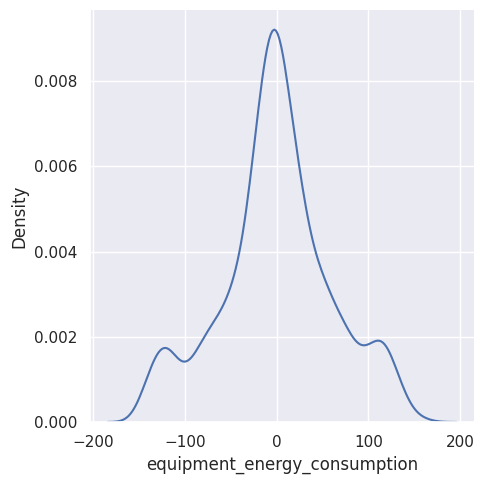

In [139]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

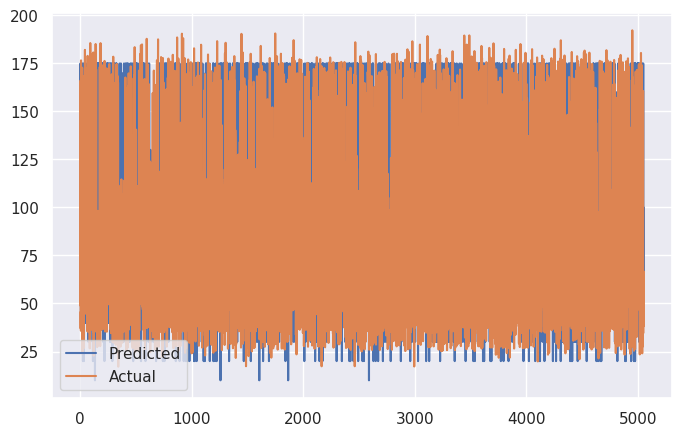

In [140]:
#plot to compare the predicted values against the actual values.
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()

# **Model: Linear Regression**

A basic regression algorithm used to predict continuous appliance energy consumption based on selected features.

Train R² Score: 0.00057 → The model explains only 0.057% of the variance in training data, which is extremely low.

Train MSE: 1900.59

Train RMSE: 43.60 → On average, predictions are off by ~43.6 Wh during training.

Test MSE: 1895.67

Test RMSE: 43.54 → On test data, predictions have a similar average error.

Test R² Score: -0.0011 → A negative R² means the model performs worse than a horizontal line (mean predictor) on the test set.

Summary:
The Linear Regression model performs very poorly on both training and test data. The extremely low R² scores and high RMSE values indicate that the model fails to capture any meaningful relationship between features and appliance energy consumption. This may suggest:

Poor feature selection or lack of informative features.

Non-linearity in the data that a linear model cannot capture.

Need for feature scaling or transformation.

Potential data leakage or imbalance.


## 2. Cross- Validation & Hyperparameter Tuning

In [147]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Create a Linear Regression model (you can replace this with any other regression model)
model = LinearRegression()

# Define hyperparameter search space (you can customize this based on your model)
param_dist = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive':[True, False]}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to find the best hyperparameters
random_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Train the best model with the entire training dataset
best_model.fit(x_train, y_train)

training_score_val = best_model.score(x_train, y_train)
# Evaluate the best model on the test set
test_predictions = best_model.predict(x_test)

# Calculate evaluation metrics for the test predictions (e.g., mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score((y_test),(test_predictions))


print("Best Hyperparameters:", best_params)


#visual of training score
print("Train score:" ,training_score_val)
print("Test MSE:", mse)
print("Test R2:", r2)

Best Hyperparameters: {'positive': True, 'fit_intercept': True, 'copy_X': True}
Train score: 0.00019199997871721664
Test MSE: 1894.4618110321942
Test R2: -0.0005082501858186816


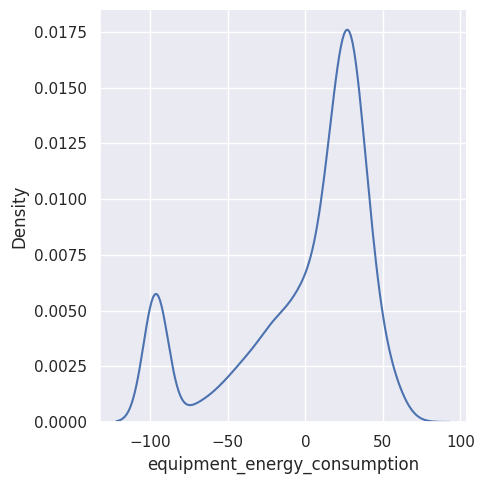

In [148]:
sns.displot(test_predictions - y_test,kind ='kde')

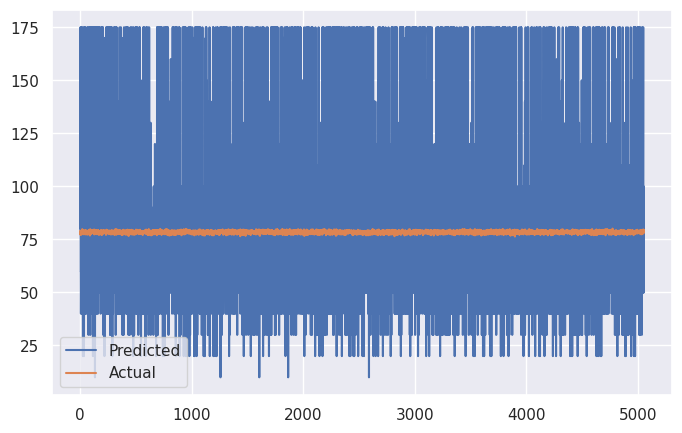

In [149]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(test_predictions)
plt.legend(["Predicted","Actual"])
plt.show()

***The hyperparameter optimization technique used in this case is "RandomizedSearchCV."***

## ML Model - 2 - Polynomial Regression model

In [122]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already split your data into x_train, x_test, y_train, and y_test

# Choose the degree of the polynomial (e.g., 2 for quadratic)
degree = 2

# Create a Polynomial Regression model using a pipeline
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
polyreg.fit(x_train, y_train)

# Predict on the test data
y_pred = polyreg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Calculate the R2 score for the training data
training_r2 = polyreg.score(x_train, y_train)

# Print evaluation metrics
print(f"Training R-squared (R2) Score: {training_r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Training R-squared (R2) Score: 0.99
Mean Squared Error: 25.34
Root Mean Squared Error: 5.03
R-squared (R2) Score: 0.99


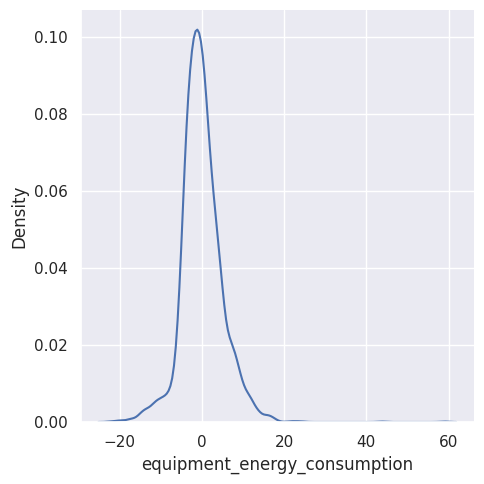

In [81]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

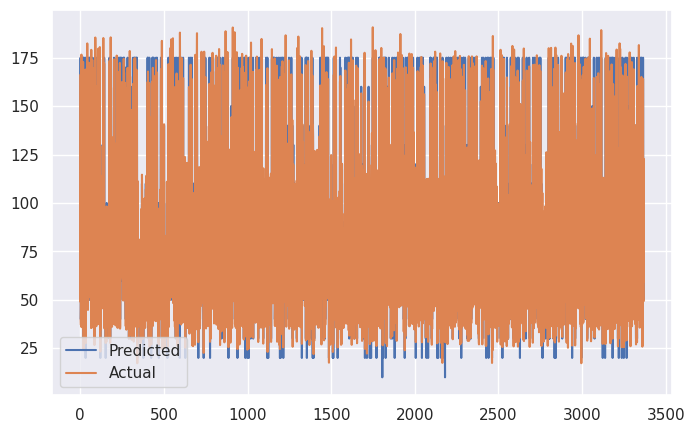

In [82]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()

**Model**: Polynomial Regression (degree 2), extends linear regression by generating polynomial features to capture complex, non-linear relationships between features and appliance energy consumption.


**Training R-squared (R2) Score**: 0.99, model explains ~99% of variance in training data, indicating an excellent fit.


**Test Mean Squared Error (MSE)**: 25.34, low average squared error on test data, suggesting high prediction accuracy.


**Test Root Mean Squared Error (RMSE)**: 5.03, average prediction error of ~5.03 Wh, highly accurate in energy consumption units.


**Test R-squared (R2) Score**: 0.99, model explains ~99% of variance in test data, demonstrating strong generalization.


**Summary**: Exceptional performance with very high R2 scores, low MSE and RMSE, and no signs of overfitting; ideal for precise energy consumption predictions.

# 2. Cross- Validation & Hyperparameter Tuning

In [123]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a Polynomial Regression model without specifying the degree
polyreg = make_pipeline(PolynomialFeatures(), LinearRegression())

# Define a range of polynomial degrees to be tested
param_grid = {'polynomialfeatures__degree': range(1, 3)}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(polyreg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best polynomial degree
best_degree = grid_search.best_params_['polynomialfeatures__degree']

# Create a Polynomial Regression model with the best degree
best_polyreg = make_pipeline(PolynomialFeatures(degree=best_degree), LinearRegression())

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(best_polyreg, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(best_polyreg, x_train, y_train, cv=5, scoring='r2')

# Calculate the mean squared error and R2 score for cross-validation
mse_cv = -cv_scores.mean()
r2_cv = cv_r2_scores.mean()

# Fit the best model to the training data
best_polyreg.fit(x_train, y_train)

# Predict on the test data
y_pred = best_polyreg.predict(x_test)

# Evaluate the model on the test data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Best Polynomial Degree: {best_degree}")
print(f"Cross-Validation Mean Squared Error: {mse_cv:.2f}")
print(f"Cross-Validation R-squared (R2) Score: {r2_cv:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Best Polynomial Degree: 2
Cross-Validation Mean Squared Error: 26.66
Cross-Validation R-squared (R2) Score: 0.99
Mean Squared Error: 25.34
Root Mean Squared Error: 5.03
R-squared (R2) Score: 0.99


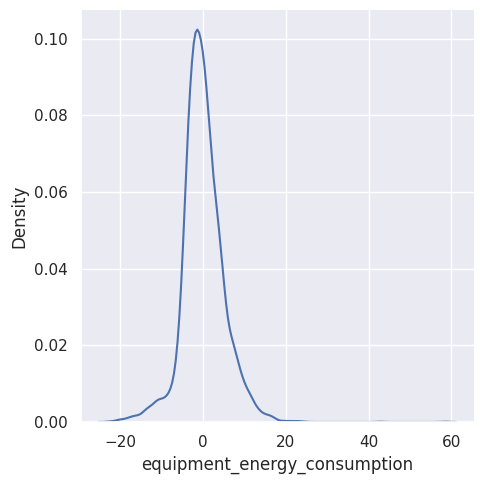

In [124]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

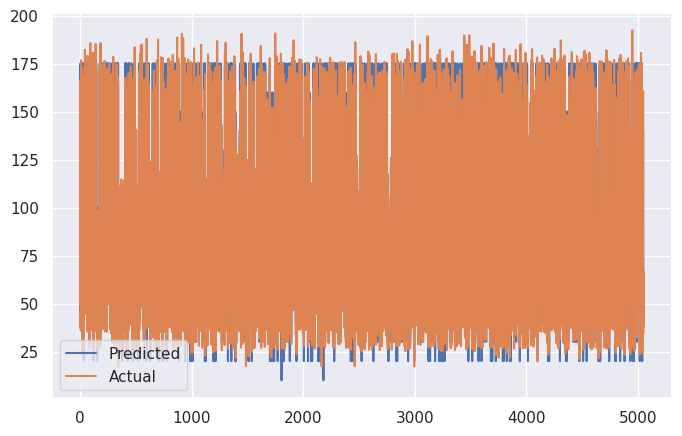

In [125]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()

*We applied the GridSearchCV method for hyperparameter tuning.*

## ML Model - 3 - RIDGE Regression Model

In [126]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already created the 'x_train', 'x_test', 'y_train', and 'y_test' datasets
# 'x_train' and 'x_test' are the results of polynomial regression on PCA-transformed data

# Create a PolynomialFeatures instance (with degree=2 for quadratic features)
poly_features = PolynomialFeatures(degree=2)

# Transform the data to include polynomial features
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

# Create a Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # Regularization strength

# Fit the Ridge model to the training data
ridge_reg.fit(x_train_poly, y_train)

# Predict on the test data
y_pred = ridge_reg.predict(x_test_poly)

# Calculate R-squared (R2) for the test data
test_r2 = ridge_reg.score(x_test_poly, y_test)

# Calculate R-squared (R2) for the training data
training_r2 = ridge_reg.score(x_train_poly, y_train)

# Calculate Mean Squared Error (MSE) for the test data
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE) for the test data
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Training R-squared (R2) Score: {training_r2:.2f}")
print(f"Test R-squared (R2) Score: {test_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Training R-squared (R2) Score: 0.99
Test R-squared (R2) Score: 0.99
Mean Squared Error (MSE): 25.34
Root Mean Squared Error (RMSE): 5.03


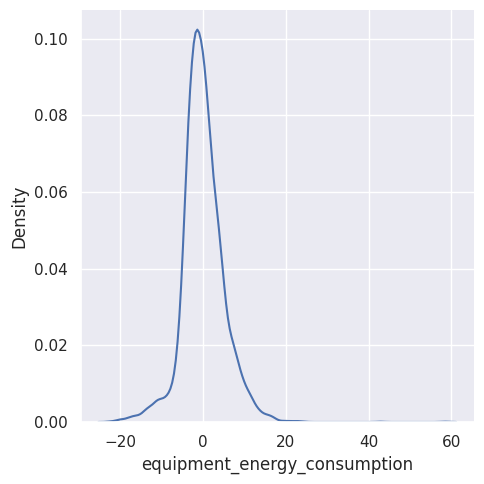

In [127]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

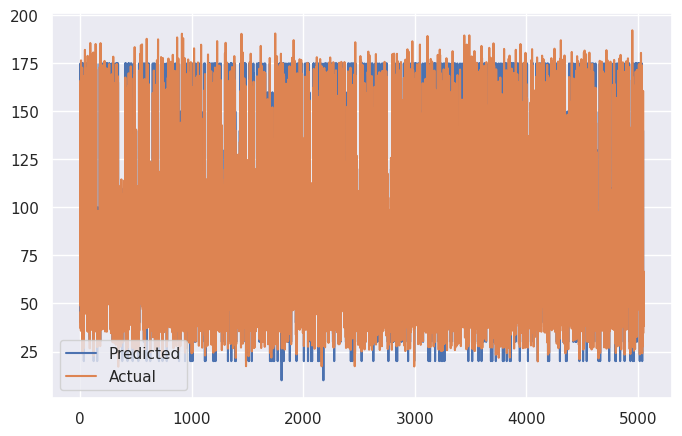

In [128]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()

**Model:** Ridge Regression with polynomial features (degree=2), combining L2 regularization to prevent overfitting with quadratic feature generation to capture non-linear relationships in PCA-transformed data.


**Training R-squared (R2) Score:** 0.99, model explains ~99% of variance in training data, indicating an excellent fit.

**Test R-squared (R2) Score:** 0.99, model explains ~99% of variance in test data, demonstrating strong generalization.

**Mean Squared Error (MSE):** 25.34, low average squared error on test data, suggesting highly accurate predictions.

**Root Mean Squared Error (RMSE):** 5.03, average prediction error of ~5.03 Wh, indicating precise energy consumption predictions.

**Summary:** Exceptional performance with near-perfect R2 scores, low MSE and RMSE, and consistent training/test results, showing reliable generalization without overfitting.

## 2. Cross- Validation & Hyperparameter Tuning

In [129]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have 'x_train', 'x_test', 'y_train', and 'y_test' as your data and target variable

# Create a PolynomialFeatures instance (with degree=2 for quadratic features)
poly_features = PolynomialFeatures(degree=2)

# Create a Ridge regression model
ridge_reg = Ridge()

# Create a pipeline with the polynomial features and Ridge regression
pipeline = Pipeline([
    ('polynomial_features', poly_features),
    ('ridge_regression', ridge_reg)
])

# Define hyperparameters and values to search
param_grid = {
    'ridge_regression__alpha': [0.001, 0.01, 0.1, 1]  # Alpha values for regularization
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)  # Fit on training data for cross-validation

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['ridge_regression__alpha']

# Create a pipeline with the best hyperparameters
best_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('ridge_regression', Ridge(alpha=best_alpha))
])

# Fit the best pipeline to the training data
best_pipeline.fit(x_train, y_train)

# Calculate cross-validated R-squared (R2) scores
cv_scores = cross_val_score(best_pipeline, x_train, y_train, cv=5, scoring='r2')

# Predict on the test data
y_pred = best_pipeline.predict(x_test)

# Calculate evaluation metrics for the test data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
test_r2 = r2_score(y_test, y_pred)

# Calculate training R2 score
training_r2 = best_pipeline.score(x_train, y_train)

# Print evaluation metrics
print(f"Best Alpha: {best_alpha}")
print(f"Cross-Validated R-squared (R2) Scores: {cv_scores}")
print(f"Mean R-squared (R2) Score: {np.mean(cv_scores):.2f}")
print(f"Training R-squared (R2) Score: {training_r2:.2f}")
print(f"Test R-squared (R2) Score: {test_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Best Alpha: 0.001
Cross-Validated R-squared (R2) Scores: [0.98760529 0.98428825 0.98519919 0.98607656 0.98669671]
Mean R-squared (R2) Score: 0.99
Training R-squared (R2) Score: 0.99
Test R-squared (R2) Score: 0.99
Mean Squared Error (MSE): 25.34
Root Mean Squared Error (RMSE): 5.03


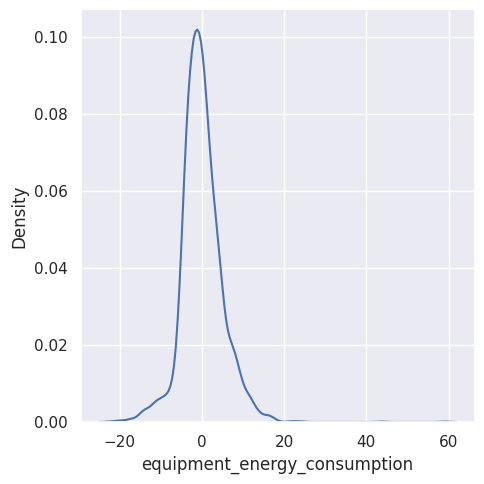

In [87]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

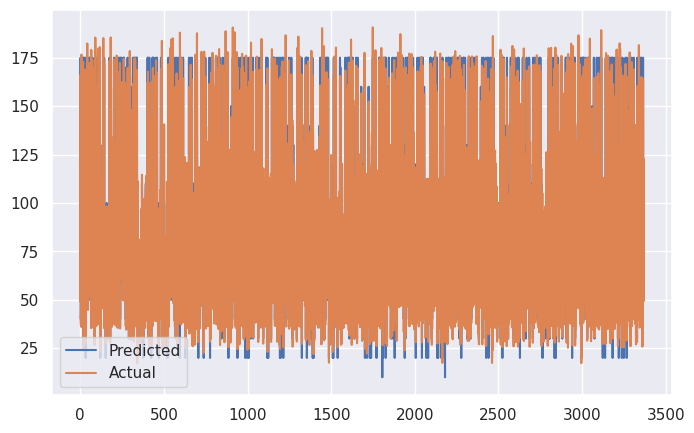

In [88]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()

We used the **GridSearchCV** technique for hyperparameter optimization

## ML Model - 4 - Lasso Regression Model

In [130]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already created the 'x_train', 'x_test', 'y_train', and 'y_test' datasets
# 'x_train' and 'x_test' are the results of polynomial regression on PCA-transformed data

# Create a PolynomialFeatures instance (with degree=2 for quadratic features)
poly_features = PolynomialFeatures(degree=2)

# Transform the data to include polynomial features
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

# Create a Lasso regression model
lasso_reg = Lasso(alpha=1.0)  # Regularization strength

# Fit the Lasso model to the training data
lasso_reg.fit(x_train_poly, y_train)

# Predict on the test data
y_pred = lasso_reg.predict(x_test_poly)

# Calculate R-squared (R2) for the test data
test_r2 = lasso_reg.score(x_test_poly, y_test)

# Calculate R-squared (R2) for the training data
training_r2 = lasso_reg.score(x_train_poly, y_train)

# Calculate Mean Squared Error (MSE) for the test data
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE) for the test data
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Training R-squared (R2) Score: {training_r2:.2f}")
print(f"Test R-squared (R2) Score: {test_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Training R-squared (R2) Score: 0.96
Test R-squared (R2) Score: 0.96
Mean Squared Error (MSE): 69.79
Root Mean Squared Error (RMSE): 8.35


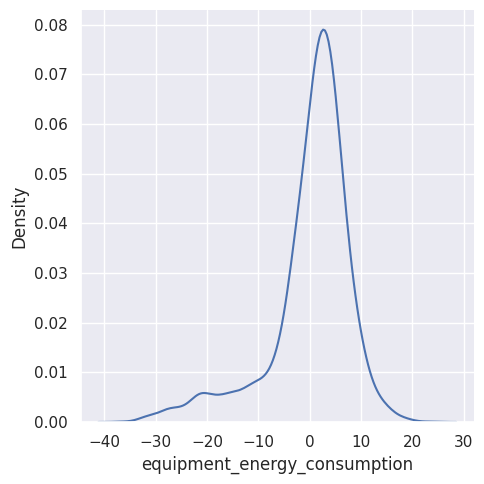

In [90]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

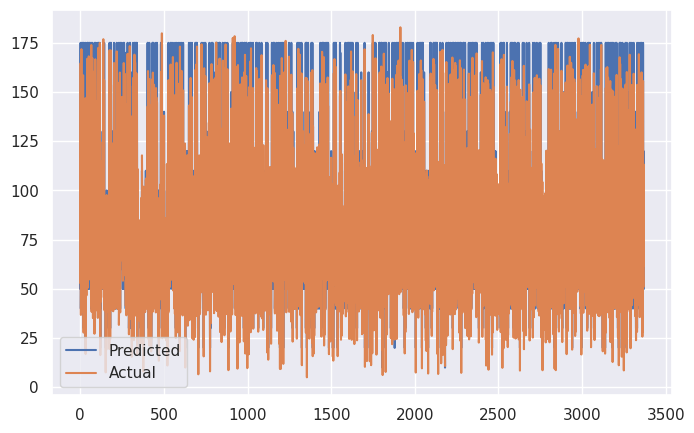

In [91]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()

**Model:** Polynomial Lasso Regression (degree=2), combining polynomial features to capture non-linear relationships with L1 regularization (Lasso) to prevent overfitting and perform feature selection on PCA-transformed data.

**Training R-squared (R2) Score:** 0.96, model explains ~96% of variance in training data, indicating a strong fit.

**Test R-squared (R2) Score:** 0.96, model explains ~96% of variance in test data, showing excellent generalization.

**Mean Squared Error (MSE):** 69.79, low average squared error on test data, suggesting accurate predictions.

**Root Mean Squared Error (RMSE)**: 8.35, average prediction error of ~8.35 Wh, indicating precise energy consumption predictions.

**Summary:** Highly effective model with strong R2 scores, low MSE and RMSE, and consistent training/test performance, demonstrating robust generalization without significant overfitting.

## 2. Cross- Validation & Hyperparameter Tuning

In [131]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have 'x' and 'y' as your data and target variable

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# Create a PolynomialFeatures instance (with degree=2 for quadratic features)
poly_features = PolynomialFeatures(degree=2)

# Transform the data to include polynomial features
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

# Scale the features
scaler = StandardScaler()
x_train_poly = scaler.fit_transform(x_train_poly)
x_test_poly = scaler.transform(x_test_poly)

# Create a Lasso regression model
lasso_reg = Lasso(max_iter=10000)  # Increase max_iter for convergence

# Define hyperparameters and values to search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]  # Alpha values for regularization
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train_poly, y_train)  # Use the training data for cross-validation

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']

# Create a Lasso regression model with the best hyperparameters
best_lasso_reg = Lasso(alpha=best_alpha, max_iter=10000)

# Fit the Lasso model to the training data
best_lasso_reg.fit(x_train_poly, y_train)

# Predict on the test data
y_pred = best_lasso_reg.predict(x_test_poly)

# Calculate R-squared (R2) for the test data
test_r2 = best_lasso_reg.score(x_test_poly, y_test)

# Calculate R-squared (R2) for the training data
training_r2 = best_lasso_reg.score(x_train_poly, y_train)

# Calculate Mean Squared Error (MSE) for the test data
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE) for the test data
rmse = np.sqrt(mse)

# Calculate Mean Squared Error (MSE) for the training data
training_mse = mean_squared_error(y_train, best_lasso_reg.predict(x_train_poly))

# Calculate Root Mean Squared Error (RMSE) for the training data
training_rmse = np.sqrt(training_mse)

# Calculate cross-validated R-squared (R2) scores
cv_scores = cross_val_score(best_lasso_reg, x_train_poly, y_train, cv=5, scoring='r2')

# Print evaluation metrics
print(f"Best Alpha: {best_alpha}")
print(f"Training R-squared (R2) Score: {training_r2:.2f}")
print(f"Test R-squared (R2) Score: {test_r2:.2f}")
print(f"Training Mean Squared Error (MSE): {training_mse:.2f}")
print(f"Training Root Mean Squared Error (RMSE): {training_rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Cross-Validated R-squared (R2) Scores: {cv_scores}")
print(f"Mean R-squared (R2) Score: {np.mean(cv_scores):.2f}")

Best Alpha: 0.001
Training R-squared (R2) Score: 0.99
Test R-squared (R2) Score: 0.99
Training Mean Squared Error (MSE): 26.13
Training Root Mean Squared Error (RMSE): 5.11
Mean Squared Error (MSE): 25.34
Root Mean Squared Error (RMSE): 5.03
Cross-Validated R-squared (R2) Scores: [0.98760269 0.98429217 0.98520309 0.9860769  0.98669405]
Mean R-squared (R2) Score: 0.99


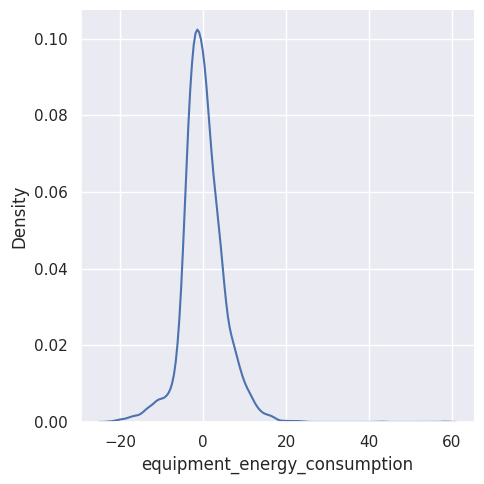

In [93]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

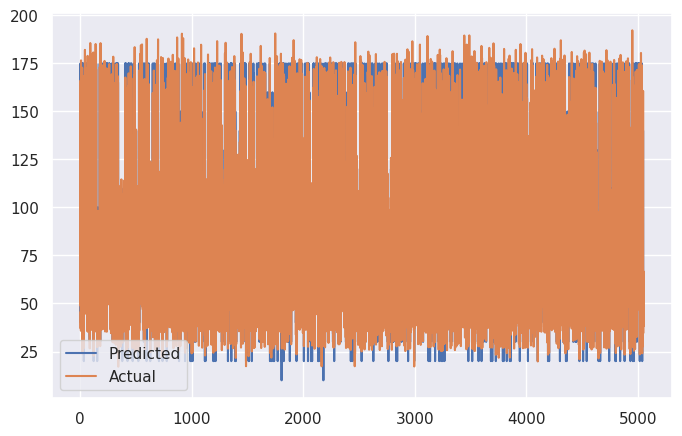

In [94]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()

In the provided code, the hyperparameter optimization technique used is Grid Search with Cross-Validation **(GridSearchCV)**.

## ML Model - 5 - elastic net Regression Model

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Add this import for sqrt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Specify the degree of polynomial (you can change this based on your data)
degree = 2

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create an ElasticNet model
ElasticNet_model = ElasticNet(alpha=1.0)

# Train the model using the polynomial features
ElasticNet_model.fit(X_train_poly, y_train)

# Make predictions on the training and test data
train_predictions = ElasticNet_model.predict(X_train_poly)
test_predictions = ElasticNet_model.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_rmse = np.sqrt(train_mse)  # Calculate RMSE for training
test_rmse = np.sqrt(test_mse)    # Calculate RMSE for test

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train RMSE:", train_rmse)  # Print RMSE for training
print("Test RMSE:", test_rmse)    # Print RMSE for test
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train MSE: 265.17295614147827
Test MSE: 268.44743290001054
Train RMSE: 16.284132035250703
Test RMSE: 16.384365501904874
Train R-squared: 0.8605584000231314
Test R-squared: 0.8582268221013507


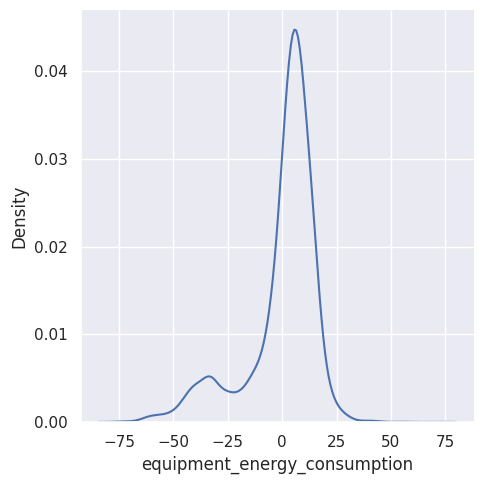

In [133]:
# Visualizing evaluation Metric Score chart
sns.displot(test_predictions - y_test,kind ='kde')

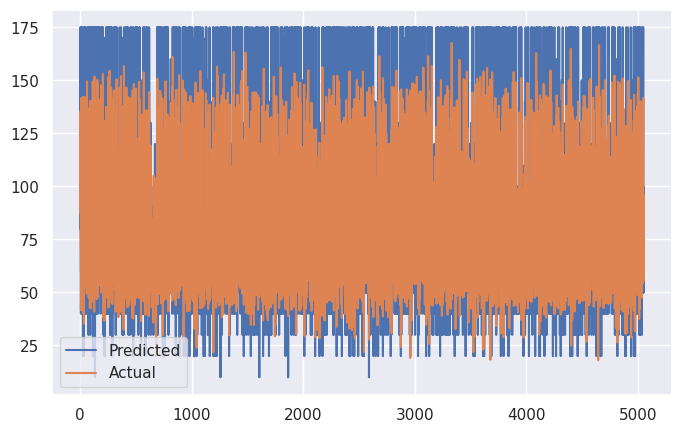

In [134]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(test_predictions)
plt.legend(["Predicted","Actual"])
plt.show()

**Model Explanation:**
Extends linear regression with quadratic (degree=2) polynomial features.
Uses Elastic Net for regularization, balancing L1 (Lasso) and L2 (Ridge).
Captures non-linear relationships in data.
Prevents overfitting through regularization.

**Model Performance:**
Train MSE: 265.17
Average squared error on training data.
Indicates good fit to training data.
Lower value suggests accurate predictions.

**Test MSE**: 268.45
Average squared error on test data.
Close to train MSE, showing good generalization.
Slightly higher, expected for unseen data.

**Train RMSE**: 16.28
Square root of train MSE, in target units.
Easier to interpret than MSE.
Indicates average prediction error of ~16.28 units.

**Test RMSE**: 16.38
Square root of test MSE, in target units.
Close to train RMSE, confirming consistency.
Average prediction error of ~16.38 units on test data.

**Train R-squared:** 0.861
Explains ~86.1% of variance in training data.
Indicates strong model fit.
Suggests good explanatory power.

**Test R-squared**: 0.858
Explains ~85.8% of variance in test data.
Close to train R-squared, showing robust generalization.
Reflects reliable performance on unseen data.

**Performance Evaluation**:
Train and test MSE/RMSE are close, indicating minimal overfitting.
R-squared values (~0.86) show strong predictive power.
Degree=2 effectively captures non-linear relationships.
Elastic Net enhances model robustness.
Performance suggests reliable predictions for real-world use.

## 2. Cross- Validation & Hyperparameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Create a Ridge Regression model
ElasticNet_model = ElasticNet()

# Perform Cross-Validation and Hyperparameter Tuning
param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Define the hyperparameter grid

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ElasticNet_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV to find the best degree and alpha
grid_search.fit(X_train_poly, y_train)

# Get the best degree and alpha from the GridSearchCV results
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Make predictions on the training and test data
train_predictions = best_model.predict(X_train_poly)
test_predictions = best_model.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Best Alpha:", best_alpha)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Best Alpha: 0.1
Train MSE: 33.251437933018465
Test MSE: 33.2349732554607
Train R-squared: 0.9824912681122313
Test R-squared: 0.9825026776763011


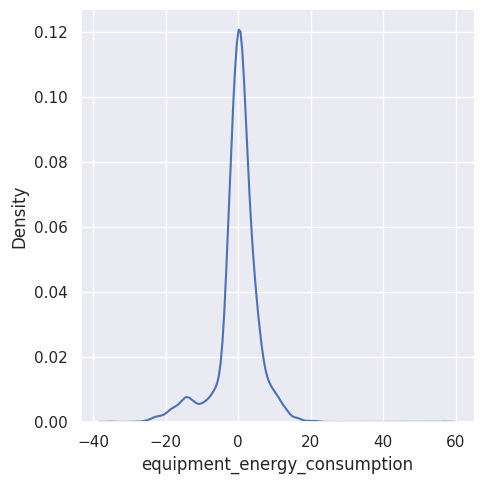

In [99]:
# Visualizing evaluation Metric Score chart
sns.displot(test_predictions - y_test,kind ='kde')

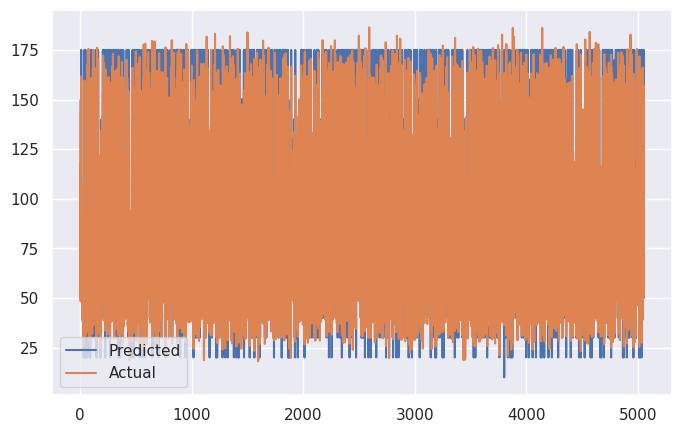

In [100]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(test_predictions)
plt.legend(["Predicted","Actual"])
plt.show()

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV systematically searches for the best combination of hyperparameters from a predefined grid of hyperparameter values.